In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 50
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams.update({'font.size': 50})

In [25]:
df = pd.read_csv('../input/data.csv')

In [26]:
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [27]:
encoder = LabelEncoder()
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [28]:
target=encoder.fit_transform(df['class'])
#target2=encoder.fit_transform(df['protocol_type'])

In [29]:
df['num_class'] = np.array(target)
#df['num_proto2'] = np.array(target2)

In [30]:
## we need 1 vs 1 multioutput classification
from sklearn.multioutput import MultiOutputClassifier
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,num_class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly,0
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly,0
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,1
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly,0
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly,0


In [31]:
def encode(df):
    encoder = LabelEncoder()
    target=encoder.fit_transform(df)
    return np.array(target)

In [32]:
num_proto = encode(df['protocol_type'])

In [33]:
df['num_proto']  = num_proto

In [34]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,num_class,num_proto
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly,0,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly,0,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,1,1
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly,0,0
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly,0,1


In [35]:
service_num = encode(df['service'])

In [36]:
df['service_num'] = service_num

In [37]:
flag_num = encode(df['flag'])

In [38]:
df['flag_num'] = flag_num

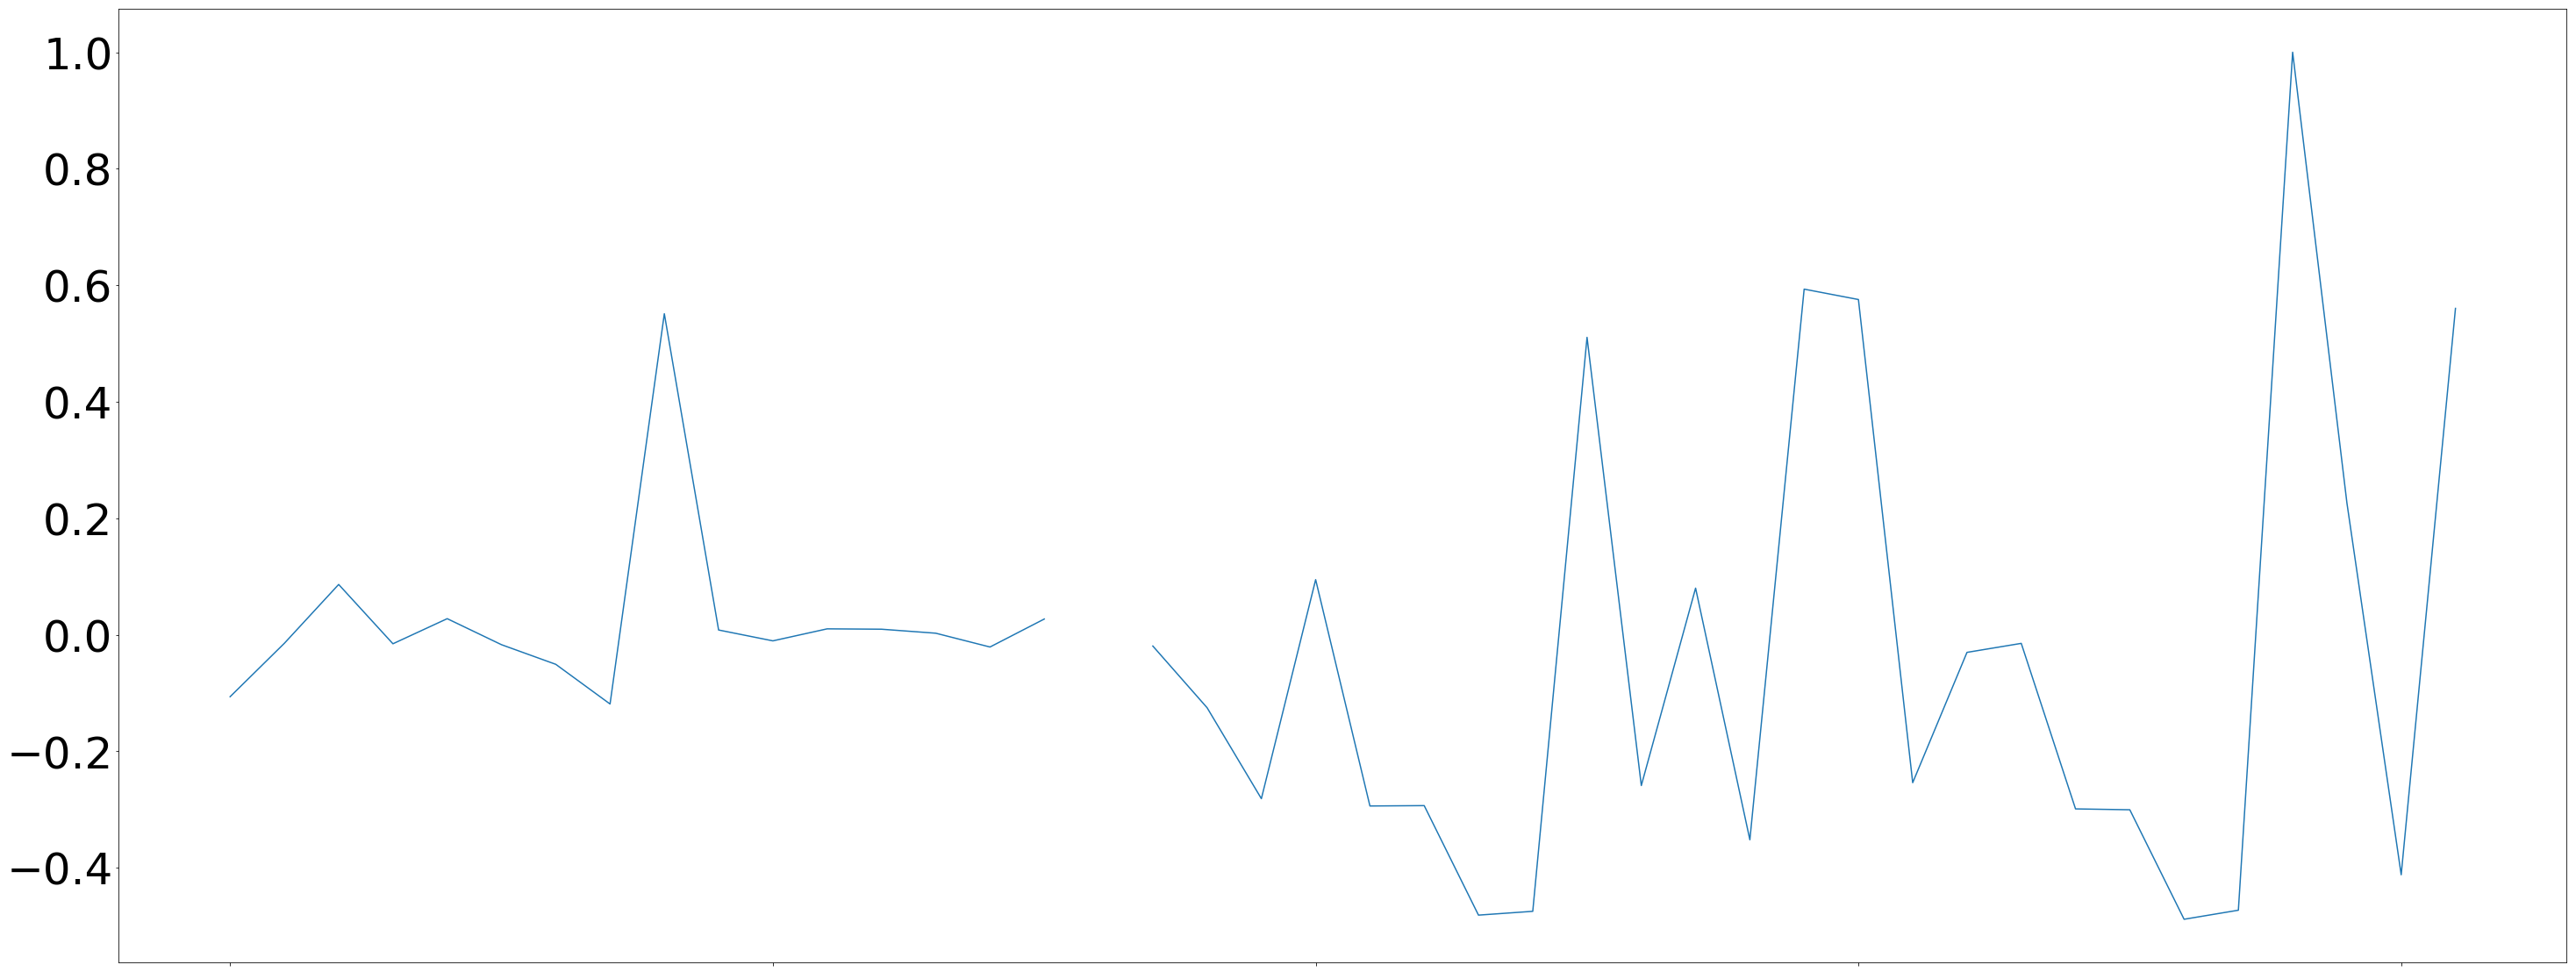

In [39]:
df.corr()['num_class'].plot()

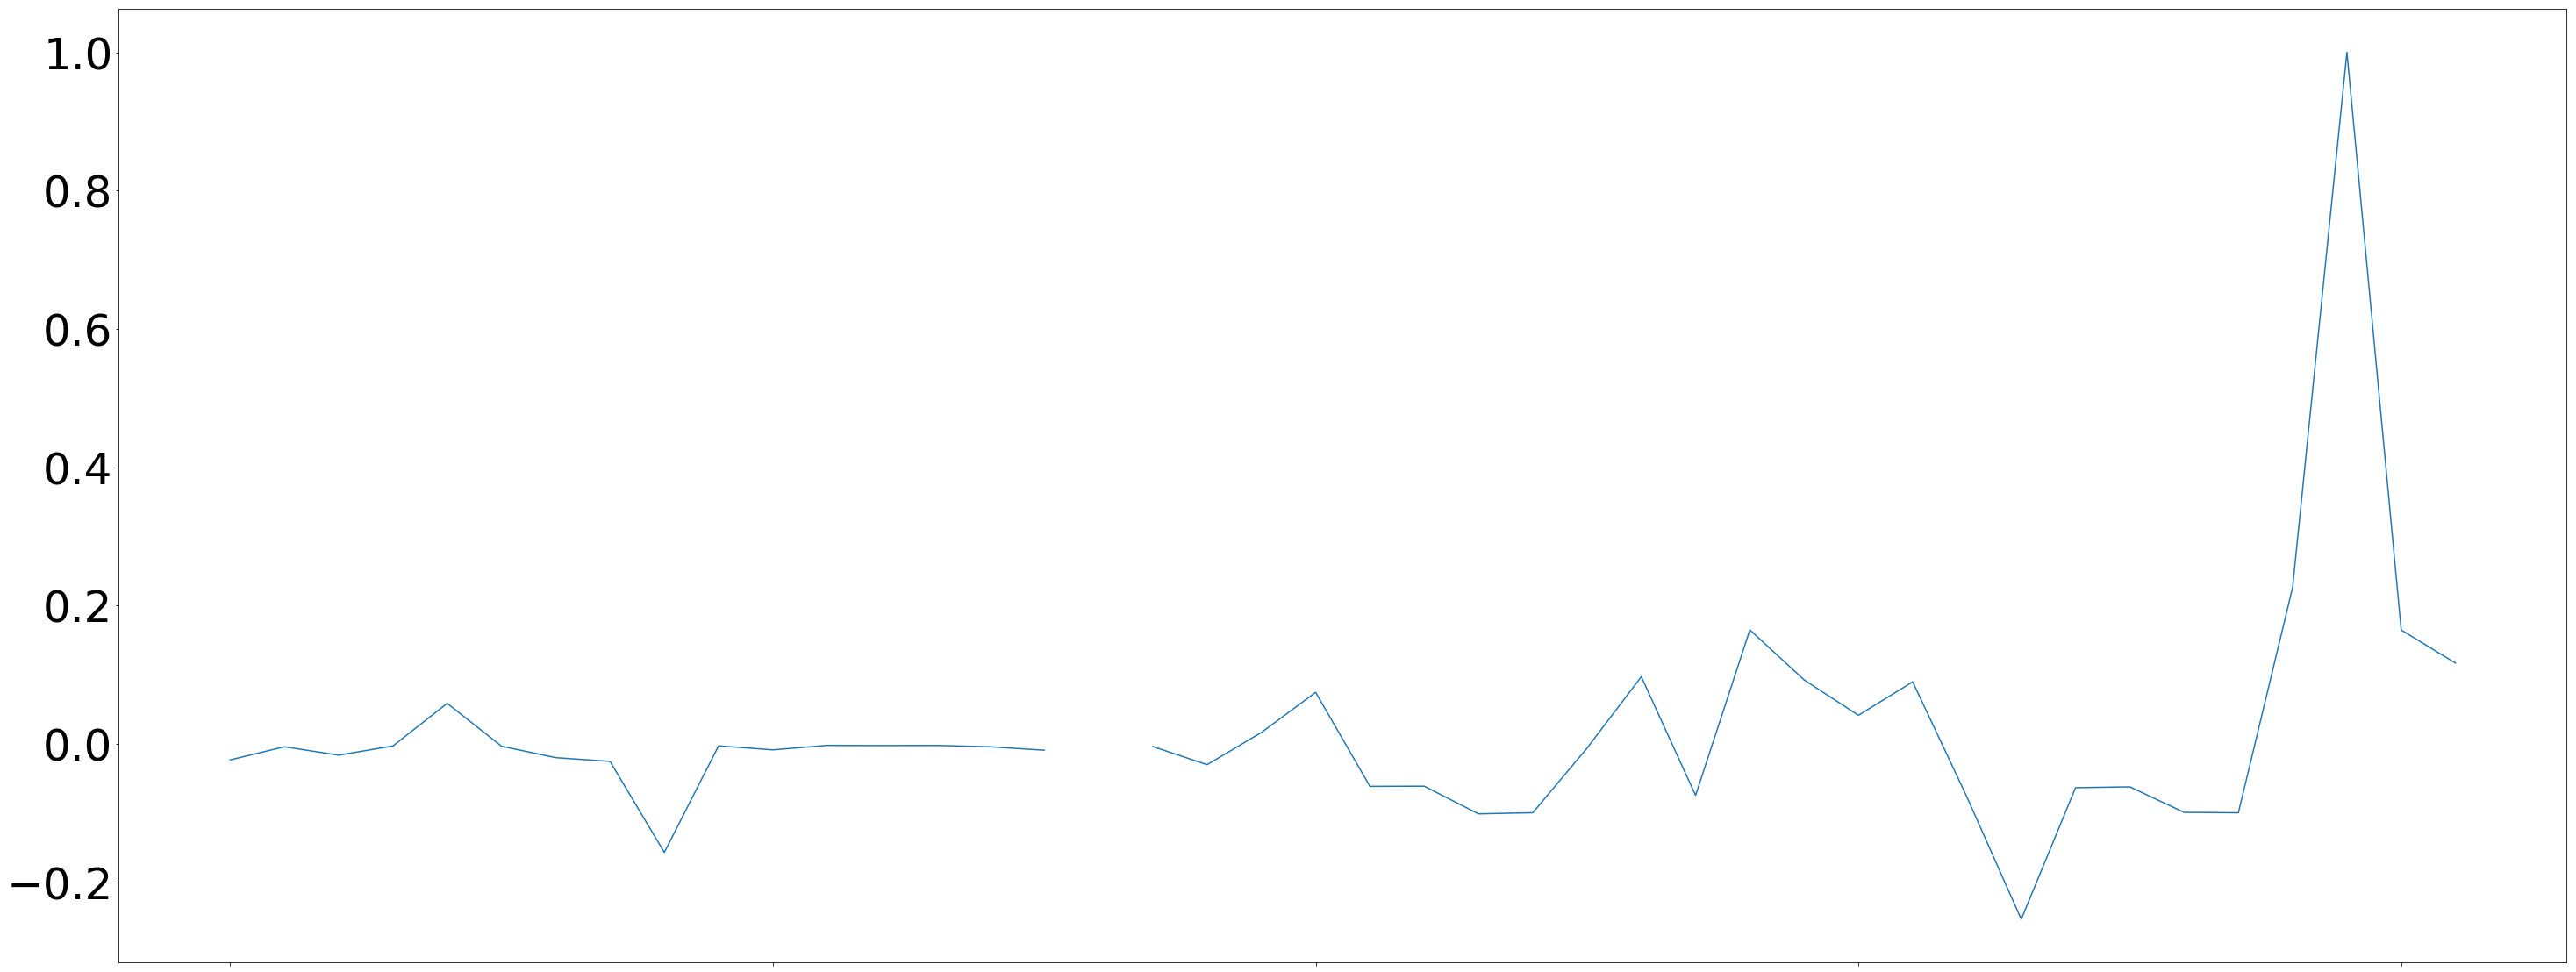

In [40]:
df.corr()['num_proto'].plot()


In [41]:
df_working = df[['duration','dst_bytes','wrong_fragment','num_failed_logins','logged_in','num_compromised','su_attempted','num_root','num_file_creations','num_shells','num_access_files','is_guest_login','srv_count','same_srv_rate','srv_diff_host_rate','dst_host_same_srv_rate','num_proto','flag_num','num_class']]

In [42]:
df_working.head()

,duration,dst_bytes,wrong_fragment,num_failed_logins,logged_in,num_compromised,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,srv_count,same_srv_rate,srv_diff_host_rate,dst_host_same_srv_rate,num_proto,flag_num,num_class
0,0,0,0,0,0,0,0,0,0,0,0,0,10,0.04,0.00,0.04,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.01,0.00,0.00,1,1,0
2,2,0,0,0,0,0,0,0,0,0,0,0,1,1.00,0.00,0.61,1,9,1
3,0,0,0,0,0,0,0,0,0,0,0,0,65,1.00,1.00,1.00,0,9,0
4,1,15,0,0,0,0,0,0,0,0,0,0,8,1.00,0.75,0.31,1,2,0


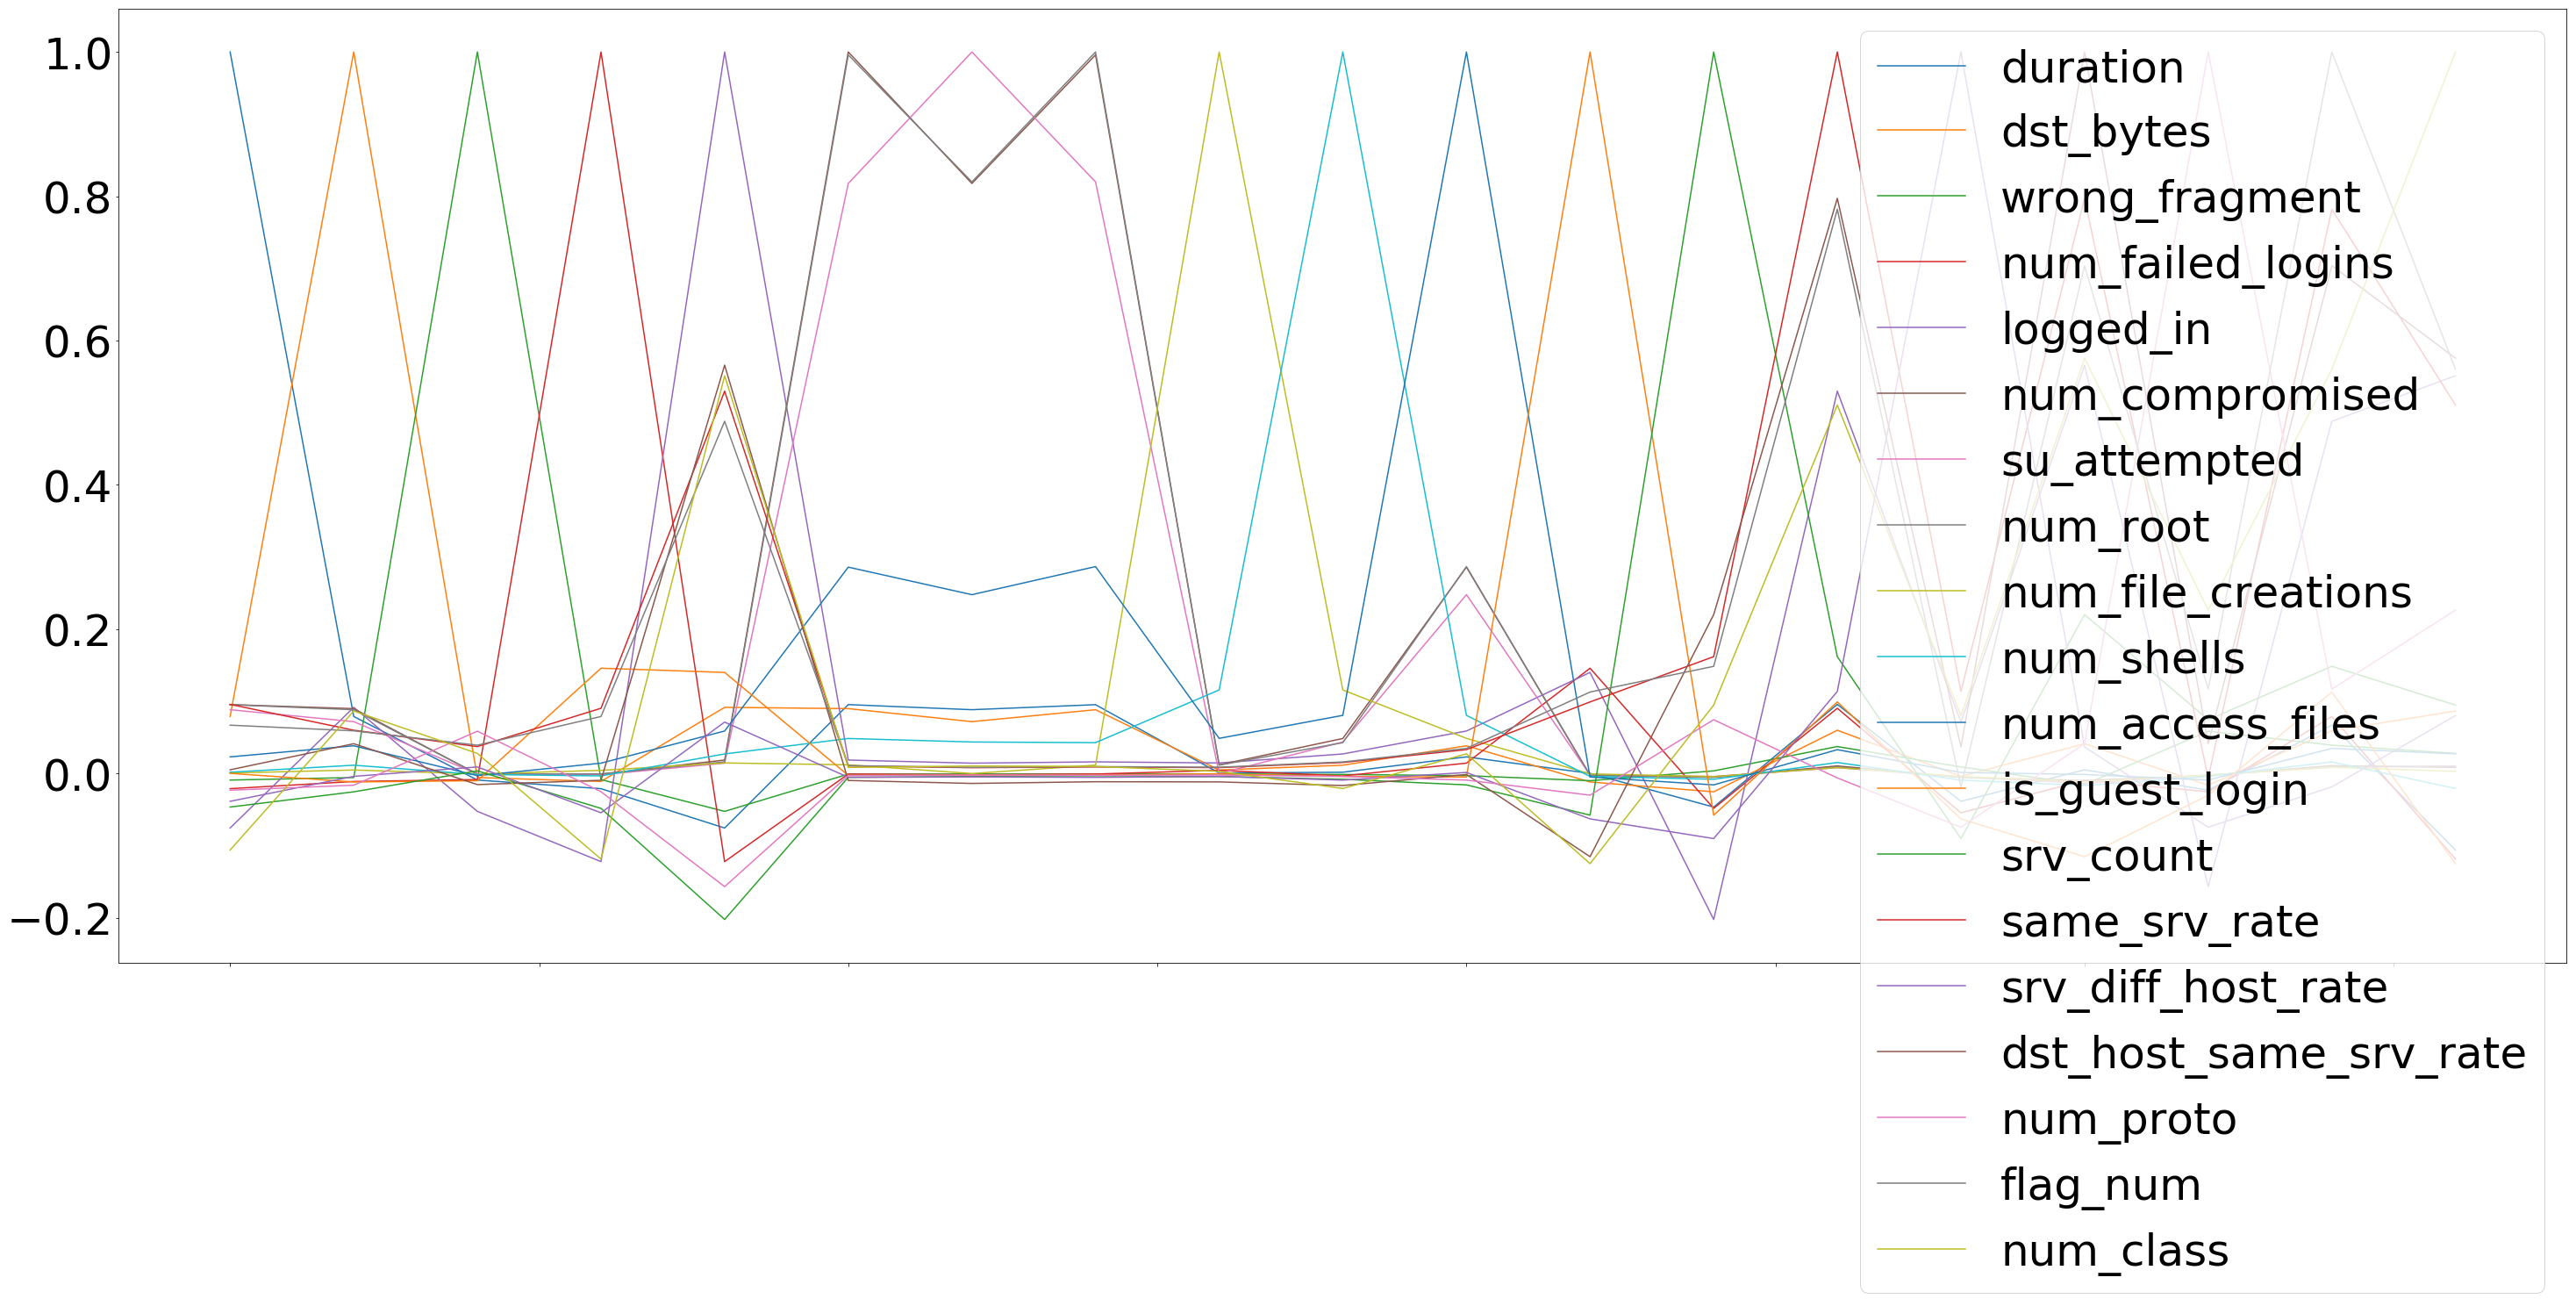

In [43]:
df_working.corr().plot()

In [44]:
df_working.corr()['num_class']

duration                 -0.106201
dst_bytes                 0.086466
wrong_fragment            0.027739
num_failed_logins        -0.118709
logged_in                 0.551159
num_compromised           0.008301
su_attempted              0.010274
num_root                  0.009652
num_file_creations        0.002798
num_shells               -0.020895
num_access_files          0.027126
is_guest_login           -0.125100
srv_count                 0.094713
same_srv_rate             0.510634
srv_diff_host_rate        0.080156
dst_host_same_srv_rate    0.575526
num_proto                 0.226362
flag_num                  0.560327
num_class                 1.000000
Name: num_class, dtype: float64

In [45]:
## splitting the X and y
## we are splitting two label in here first one will be predicted with the most convnient
X = df_working.drop(['num_class'], axis=1)
X = X.drop(['num_proto'], axis=1)
y1 = df_working[['num_class','num_proto']]
y2 = df_working[['num_class']]
#y2 = df_working[['num_proto']]

## two working label in necessayy because we want to find the first best param | independently



In [46]:
X.head()

,duration,dst_bytes,wrong_fragment,num_failed_logins,logged_in,num_compromised,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,srv_count,same_srv_rate,srv_diff_host_rate,dst_host_same_srv_rate,flag_num
0,0,0,0,0,0,0,0,0,0,0,0,0,10,0.04,0.00,0.04,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.01,0.00,0.00,1
2,2,0,0,0,0,0,0,0,0,0,0,0,1,1.00,0.00,0.61,9
3,0,0,0,0,0,0,0,0,0,0,0,0,65,1.00,1.00,1.00,9
4,1,15,0,0,0,0,0,0,0,0,0,0,8,1.00,0.75,0.31,2


In [47]:
y1.head()

,num_class,num_proto
0,0,1
1,0,1
2,1,1
3,0,0
4,0,1


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,KFold,StratifiedKFold

In [49]:
y2.head()

,num_class
0,0
1,0
2,1
3,0
4,0


In [50]:
x_train,x_test,y_train,y_test = train_test_split(X,y2,test_size=.2)
x_train1,x_test1,y_train1,y_test1 = train_test_split(X,y1,test_size=.2)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

#### new still unused may be not compatable with base sklearn class
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
###

# Best upon 1 we predict the next one we cant do grid both all at once cause .each require different parameter set  and we are doing one vs one prediction

In [52]:
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
print (param_grid)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10,n_jobs=-1,verbose=2 ,scoring = 'accuracy')
grid.fit(x_train,y_train)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.2min finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [53]:
##new 
import seaborn as sns
import pandas as pd

def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel('Accuracy')
    ax.legend(title=param_z)
    return fig

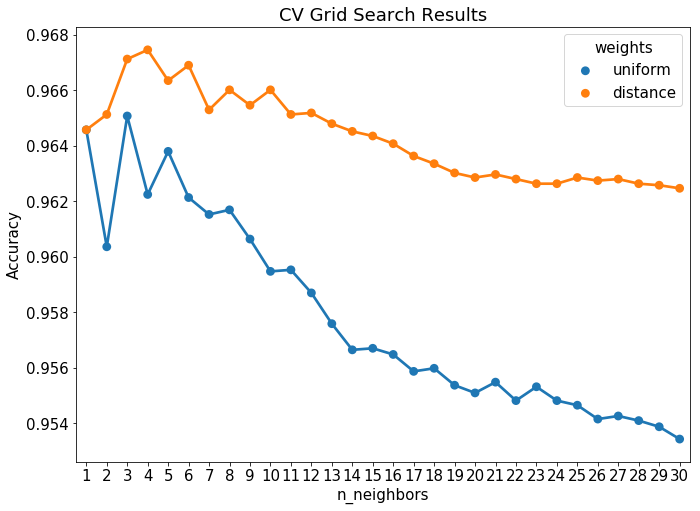

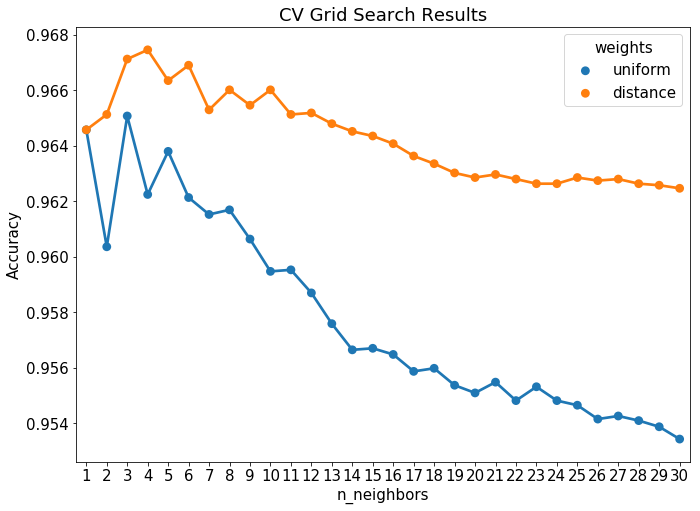

In [54]:
plt.rcParams.update({'font.size': 15})
plot_cv_results(grid.cv_results_, 'n_neighbors', 'weights')

In [55]:
## jupyter can render without show command thats why two pic

In [56]:
## plotting with respect to whole

In [57]:
from sklearn.metrics import confusion_matrix
knn_final = grid.best_estimator_
tmp_pred_knn = knn.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
import seaborn as sns
pr1 = tmp_pred_knn.predict(x_test)

confusion_matrix1 =confusion_matrix(y_test,pr1)
print (confusion_matrix1)

from sklearn.metrics import precision_score,recall_score,f1_score
print ("Precision score "+str(precision_score(y_test,pr1)))
print ("Recall score "+str(recall_score(y_test,pr1)))
print ("F1 score "+str(f1_score(y_test,pr1)))

[[2483   77]
 [  68 1881]]
Precision score 0.9606741573033708
Recall score 0.9651103129810159
F1 score 0.9628871256718711


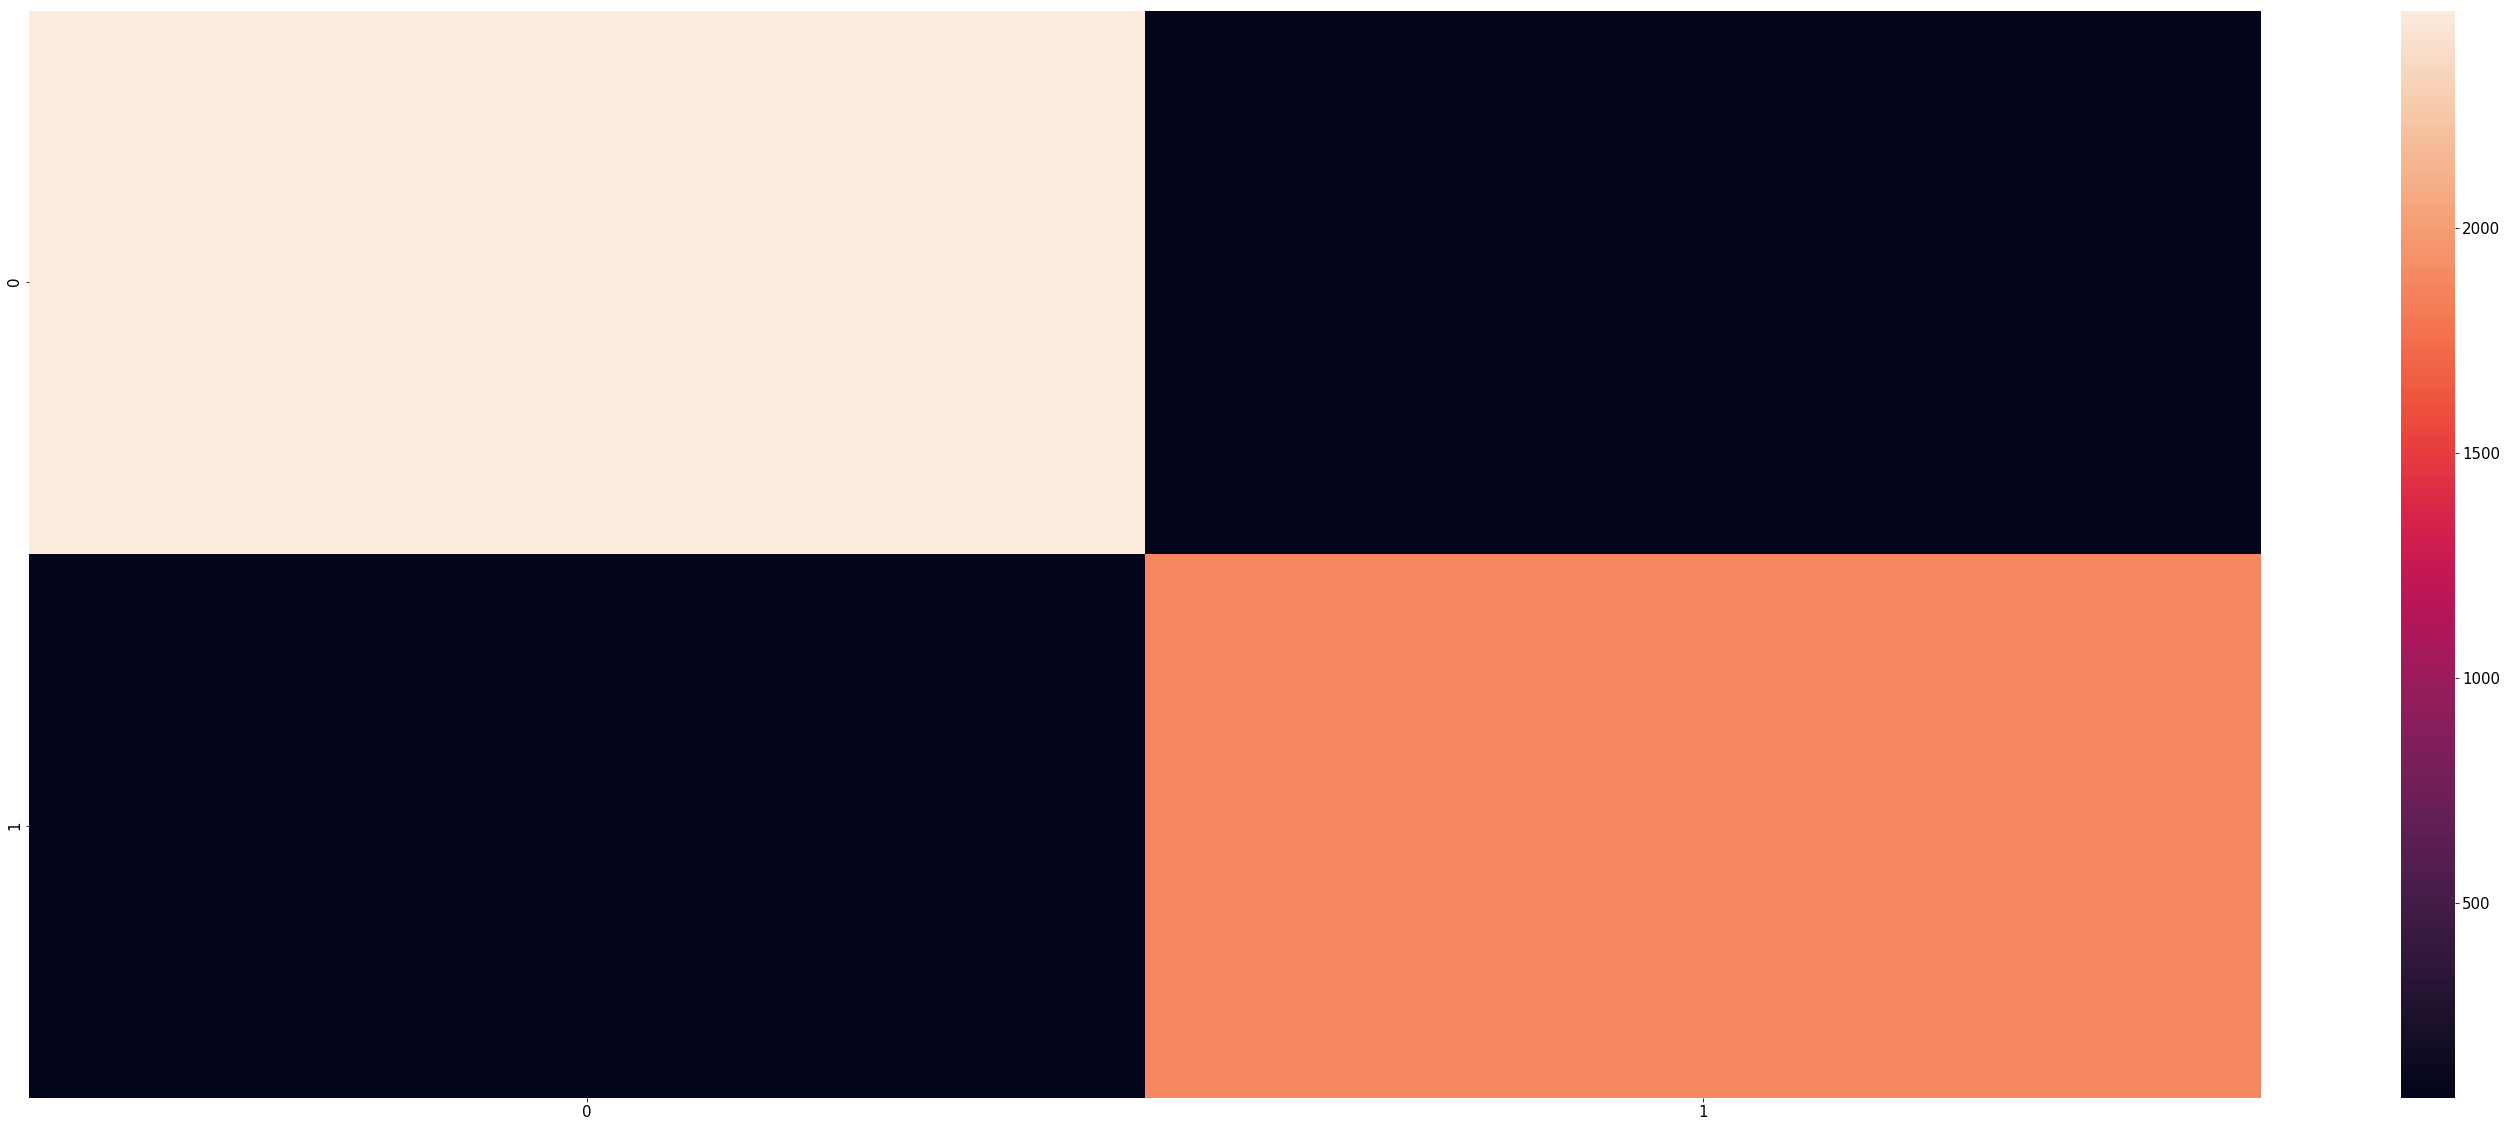

In [61]:
sns.heatmap(confusion_matrix1)

In [63]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2) ## njobs force the computer to use all their resources

In [64]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 22.1min finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[2520   40]
 [  69 1880]]
Precision score 0.9791666666666666
Recall score 0.9645972293483838
F1 score 0.9718273455673301


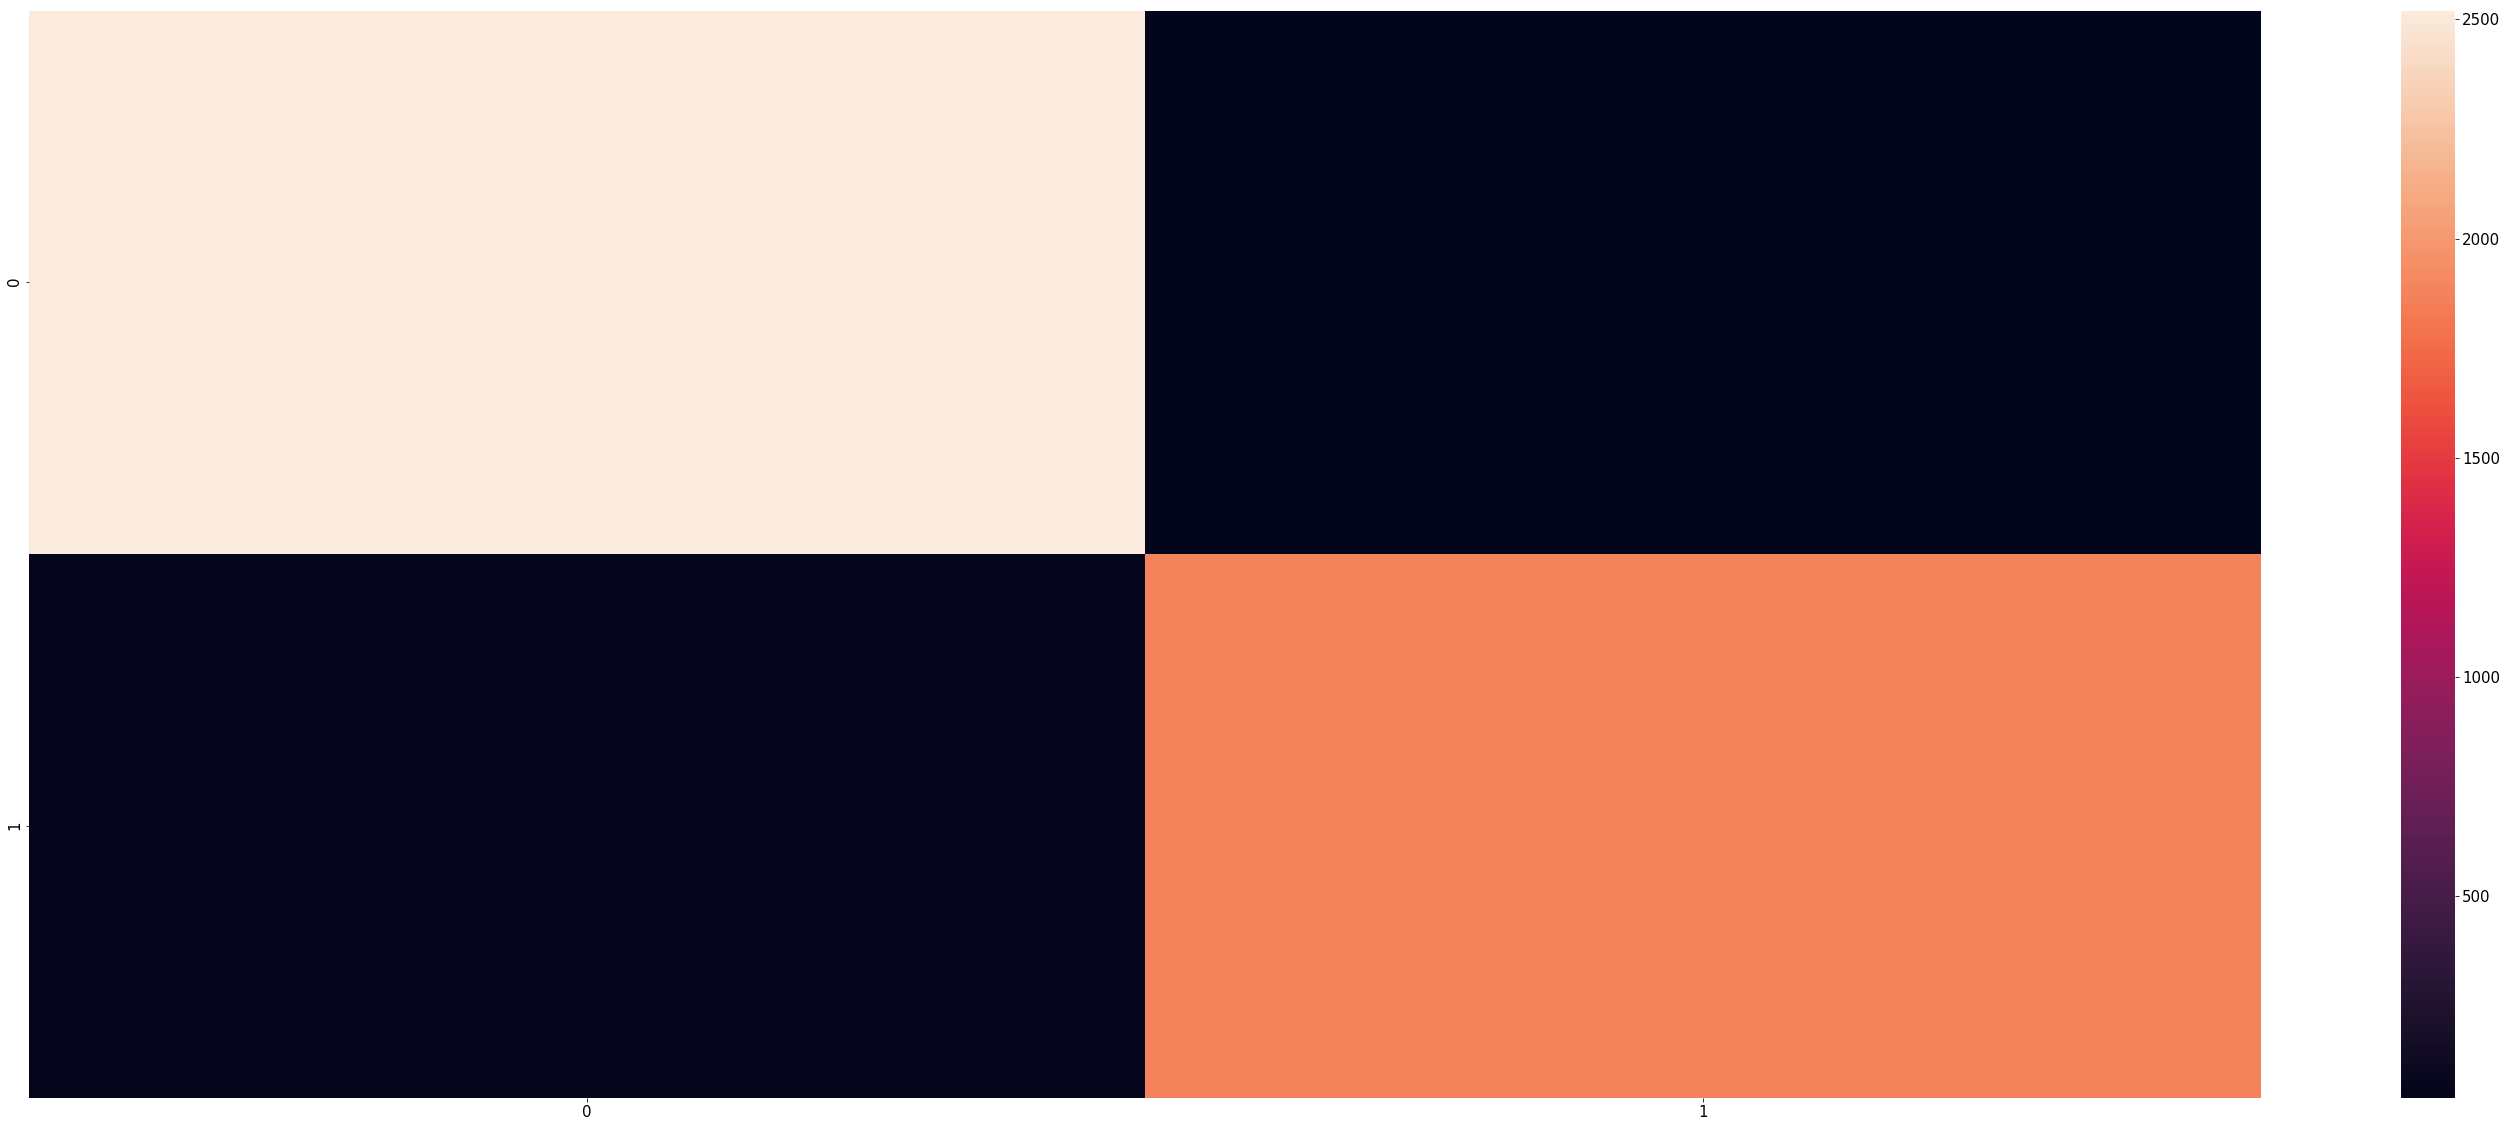

In [65]:
rf_final=grid_search.best_estimator_
tmp_pred_rf = rf_final.fit(x_train,y_train)
pr1 = tmp_pred_rf.predict(x_test)
confusion_matrix1 =confusion_matrix(y_test,pr1)
print (confusion_matrix1)
sns.heatmap(confusion_matrix1)
print ("Precision score "+str(precision_score(y_test,pr1)))
print ("Recall score "+str(recall_score(y_test,pr1)))
print ("F1 score "+str(f1_score(y_test,pr1)))

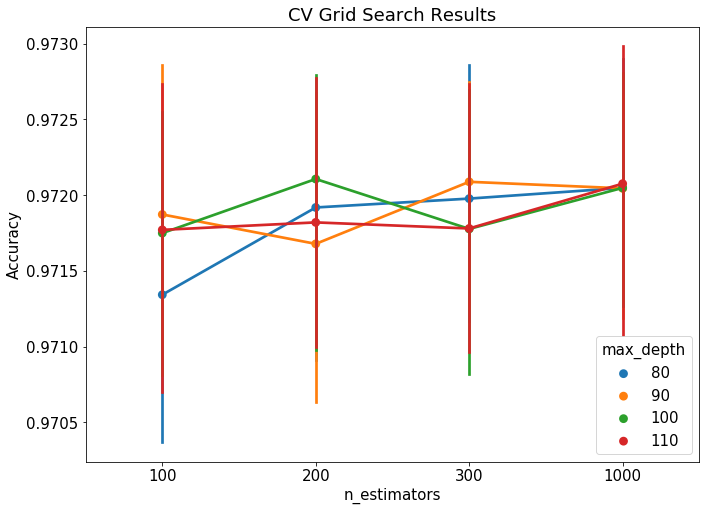

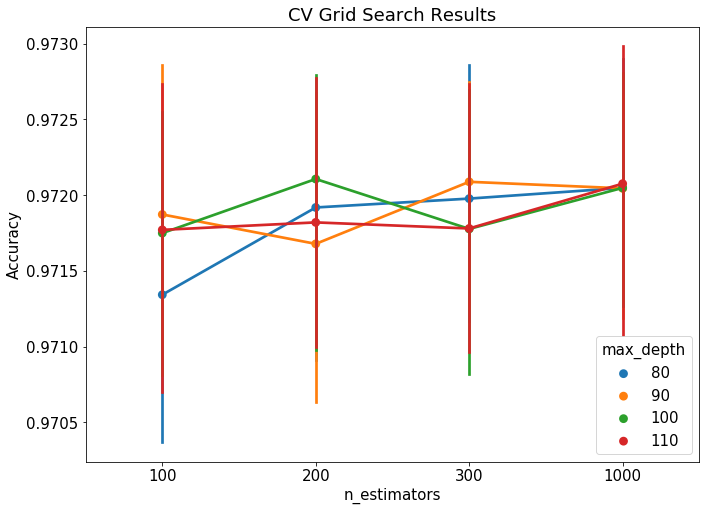

In [66]:
plot_cv_results(grid_search.cv_results_, 'n_estimators', 'max_depth')
#param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

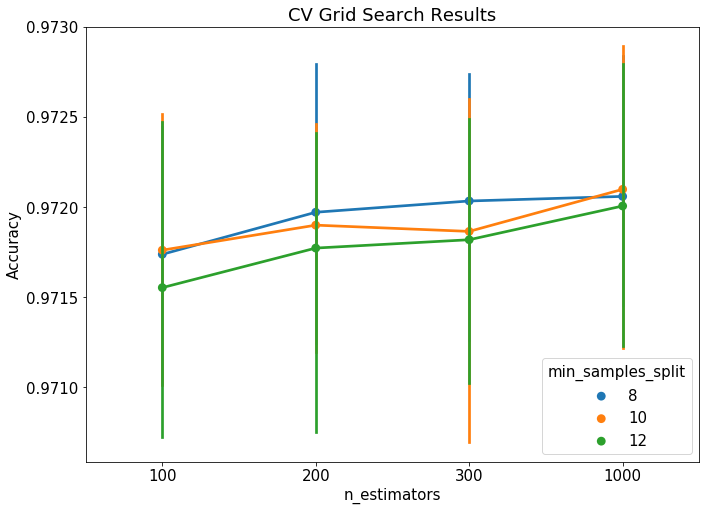

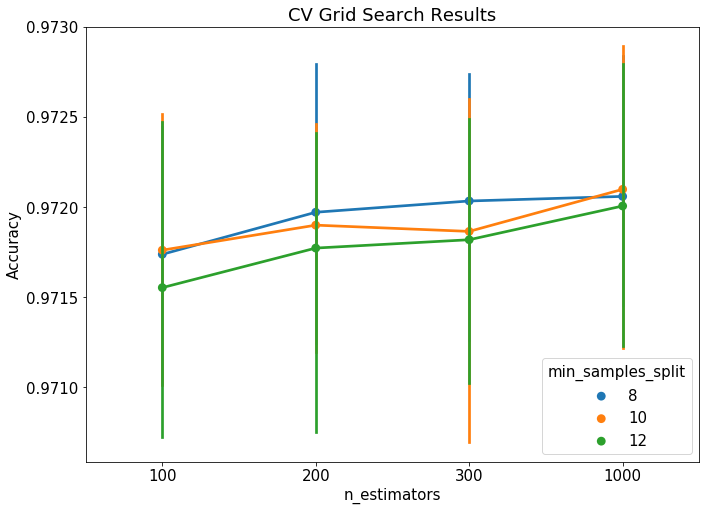

In [67]:
plot_cv_results(grid_search.cv_results_, 'n_estimators', 'min_samples_split')
#grid2 = GridSearchCV(SVC(),param_grid,n_jobs=-1,refit = True, verbose=2)

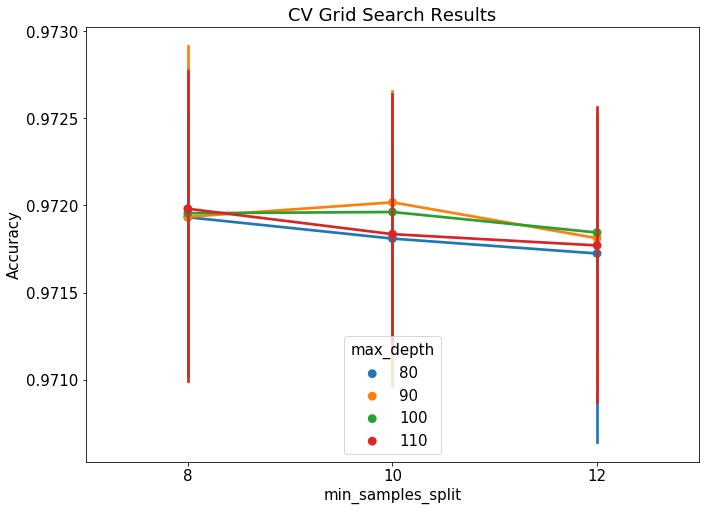

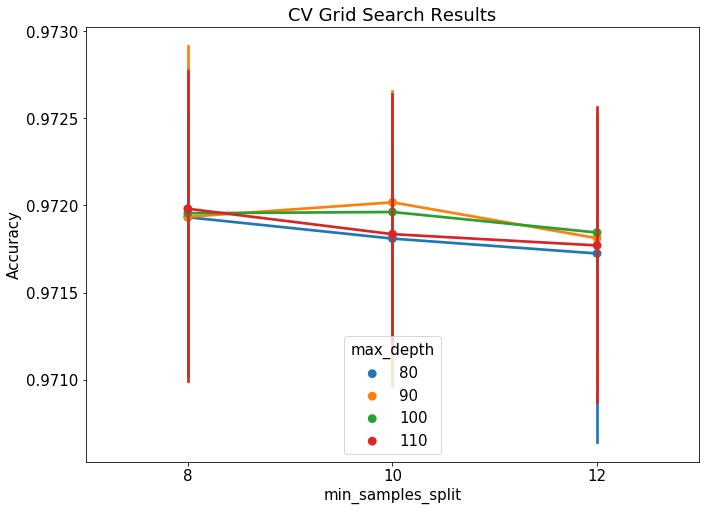

In [68]:
plot_cv_results(grid_search.cv_results_,'min_samples_split','max_depth')
#grid2.fit(x_train,y_train)

In [69]:
#svc_final = grid2.best_estimator_

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[2453  107]
 [  71 1878]]
Precision score 0.9460957178841309
Recall score 0.9635710620831196
F1 score 0.9547534316217591


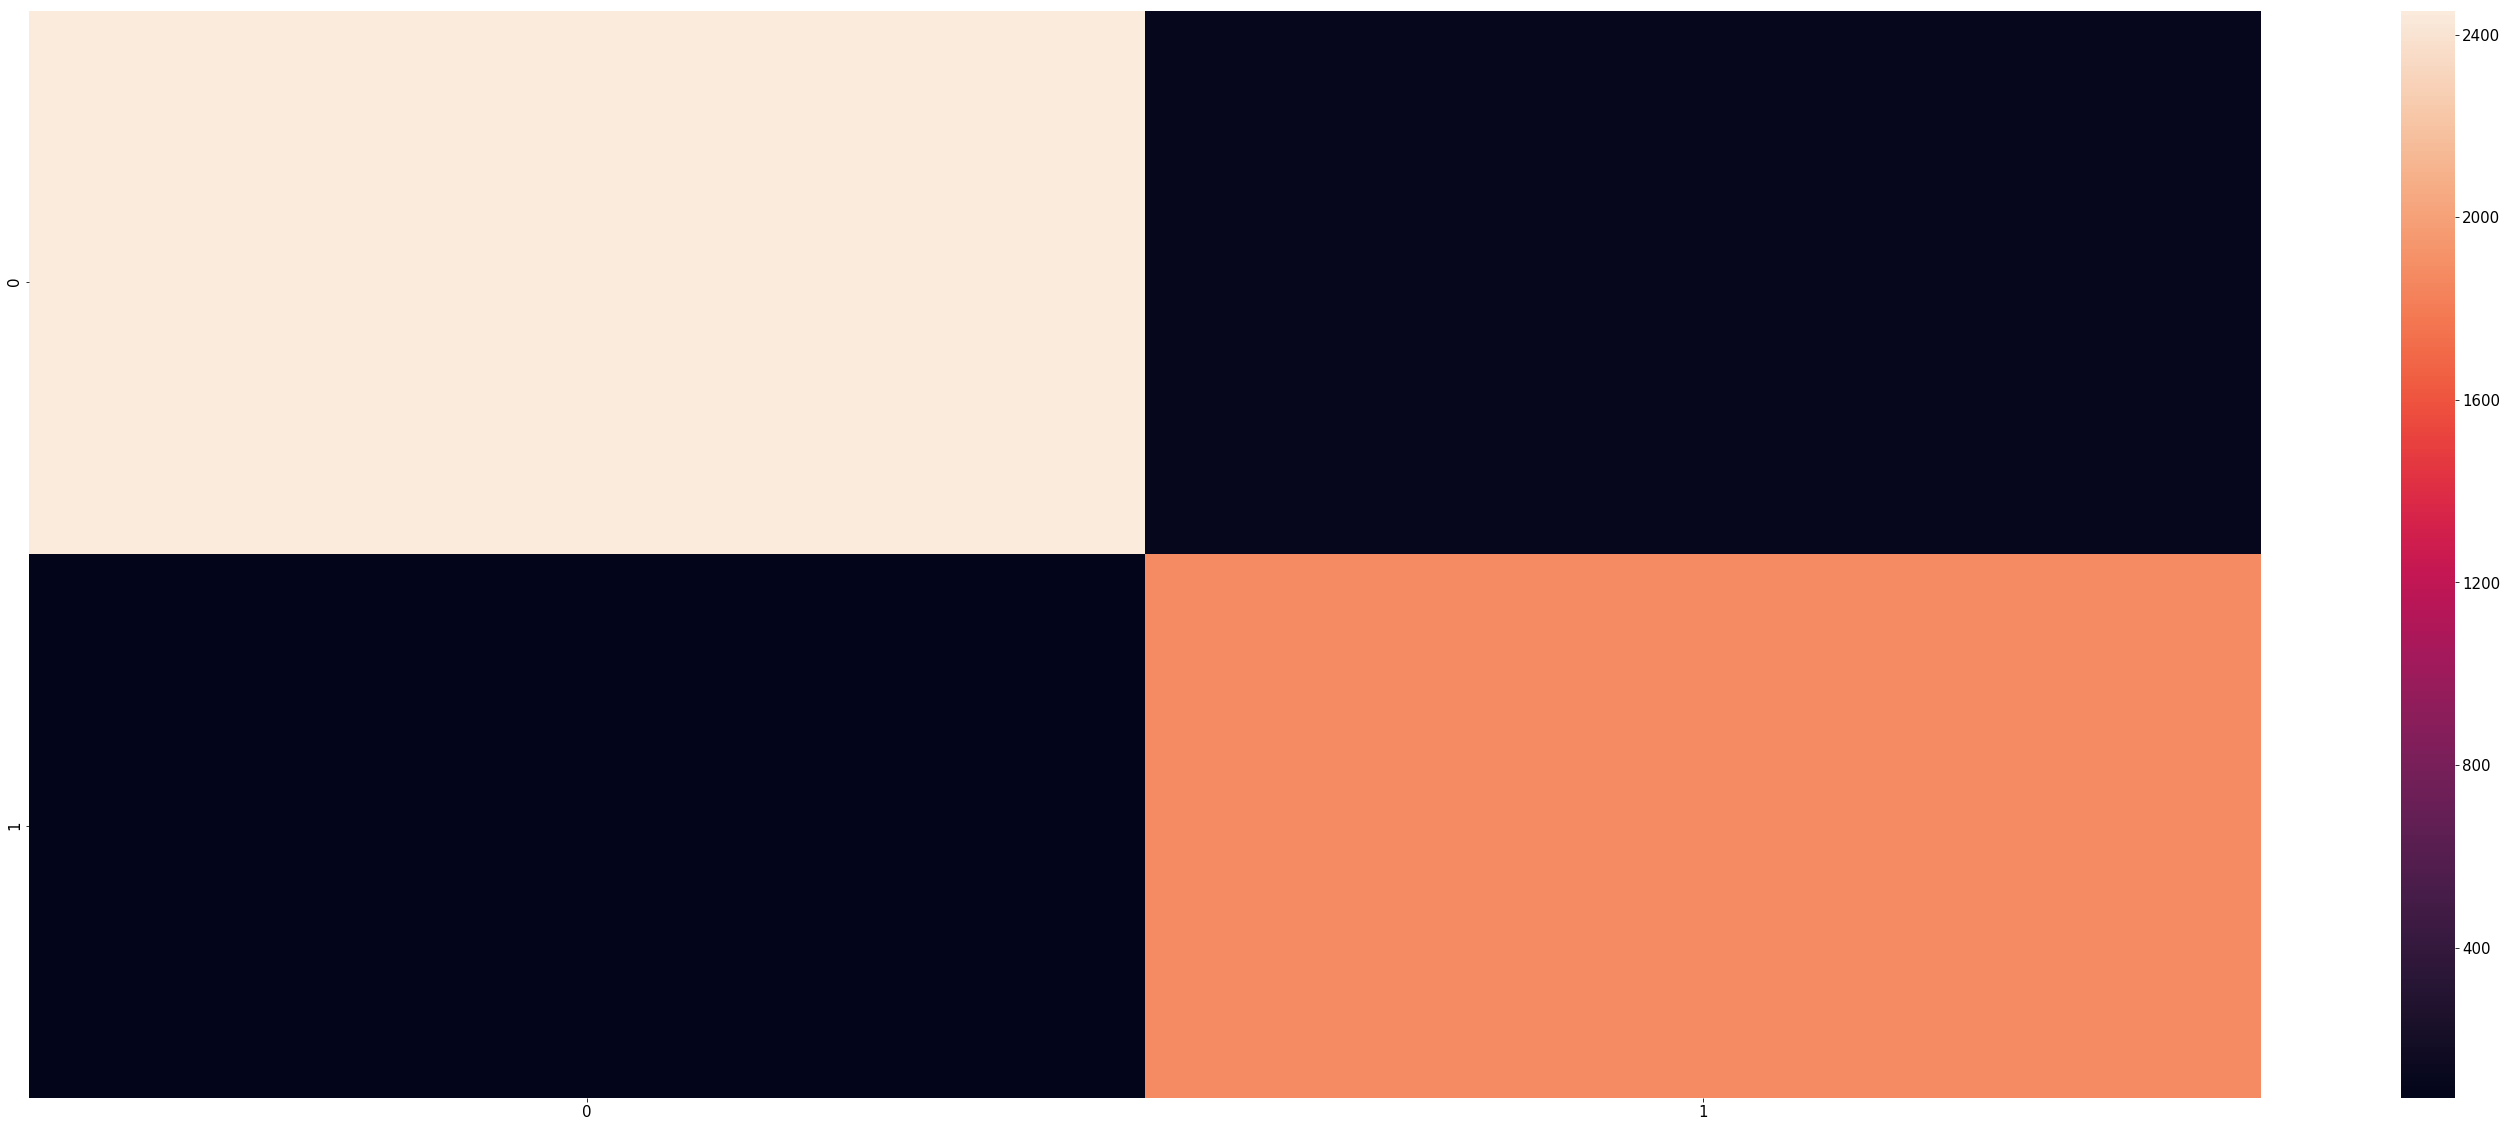

In [70]:
svc_final = SVC()
tmp_pred_rf = svc_final.fit(x_train,y_train)
pr1 = svc_final.predict(x_test)
confusion_matrix1 =confusion_matrix(y_test,pr1)
print (confusion_matrix1)
sns.heatmap(confusion_matrix1)

plt.rcParams["figure.figsize"] = fig_size
plt.rcParams.update({'font.size': 50})
print ("Precision score "+str(precision_score(y_test,pr1)))
print ("Recall score "+str(recall_score(y_test,pr1)))
print ("F1 score "+str(f1_score(y_test,pr1)))

In [71]:
param_grid = {'C':[1,10,100,1000]}
grid3 = GridSearchCV(LinearSVC(),param_grid,refit = True, verbose=2,n_jobs=-1)


In [72]:
grid3.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.3s finished
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1, param_grid={'C': [1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [73]:
ACP=[]
#plot_cv_results(grid3.cv_results_,'C',)
C = range(1,100)
for item in C:
    model = LinearSVC(C=item)
    model.fit(x_train,y_train)
    ACP.append(model.score(x_test,y_test))
    

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWar

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWar

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWar

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWar

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWar

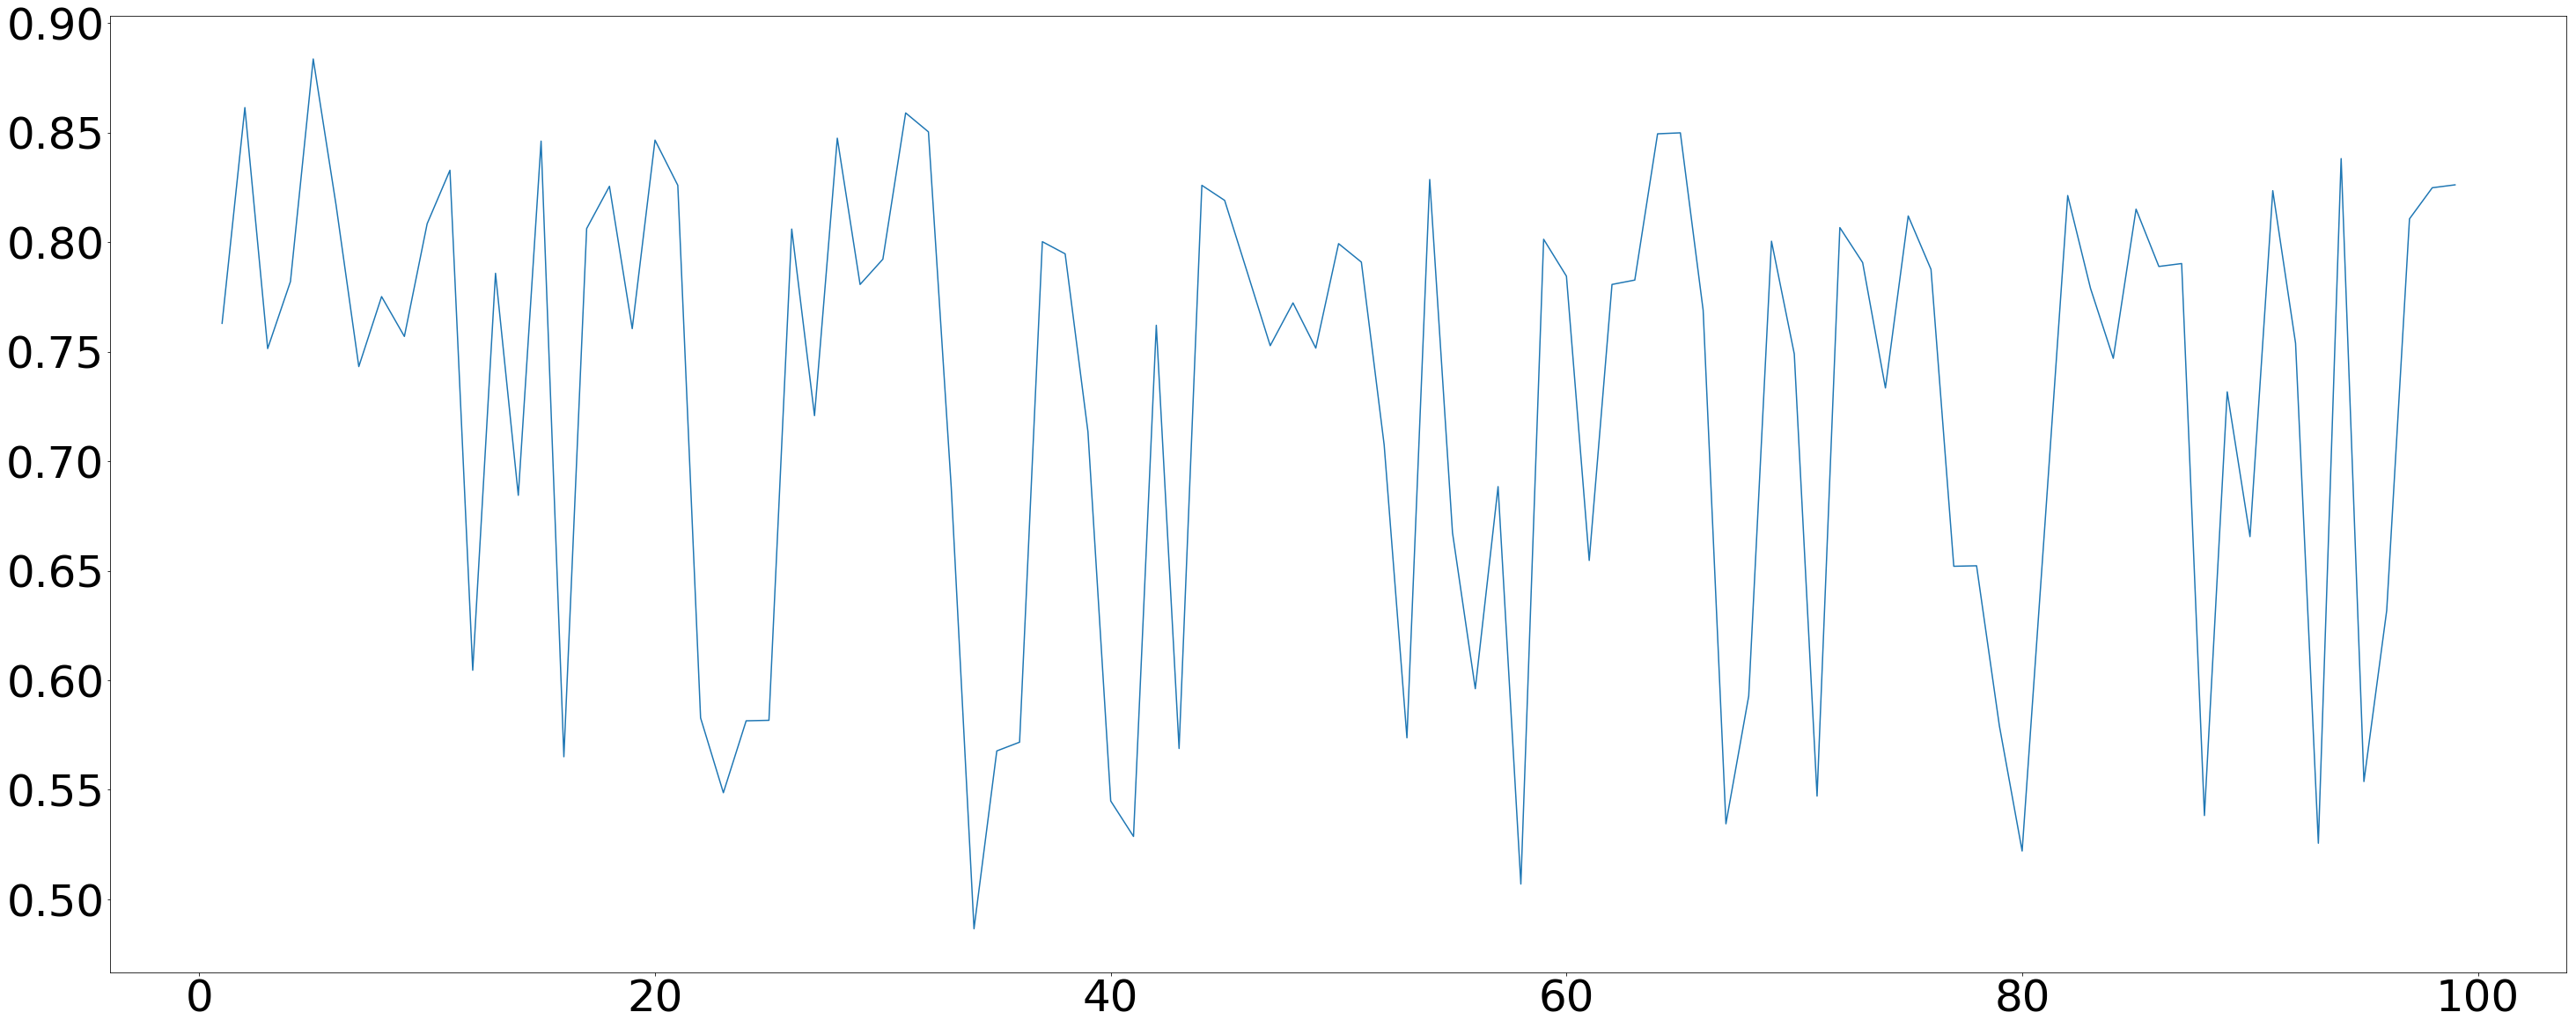

In [75]:
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams.update({'font.size': 50})
plt.plot(C,ACP)

In [76]:
print (ACP)

[0.7629186072299845, 0.8613883344422266, 0.7513861166555778, 0.7819915724107341, 0.8835662009314704, 0.8170326014637392, 0.7431803060545575, 0.7751164337990686, 0.7569305832778886, 0.8083832335329342, 0.8327788866711022, 0.6045686404967842, 0.7857618097139055, 0.6844089598580616, 0.8460856065646485, 0.5650920381459303, 0.8061654468840097, 0.8254601907296518, 0.7604790419161677, 0.8465291638944333, 0.8259037480594367, 0.5828343313373253, 0.54868041694389, 0.5815036593479708, 0.5817254380128631, 0.8059436682191173, 0.7207806609004214, 0.8474162785540031, 0.7806609004213795, 0.7921933909957862, 0.8589487691284099, 0.8502994011976048, 0.6881791971612331, 0.48658239077400756, 0.5677533821246397, 0.5717453980927035, 0.800177422931914, 0.7946329563096031, 0.713461964958971, 0.5449101796407185, 0.5287203371035706, 0.7620314925704147, 0.5688622754491018, 0.8259037480594367, 0.8190286094477711, 0.785983588378798, 0.7527167886449324, 0.7722333111554669, 0.7516078953204701, 0.7992903082723442, 0.7

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[2169  391]
 [ 281 1668]]
Precision score 0.8101019912578922
Recall score 0.8558234992303746
F1 score 0.8323353293413174


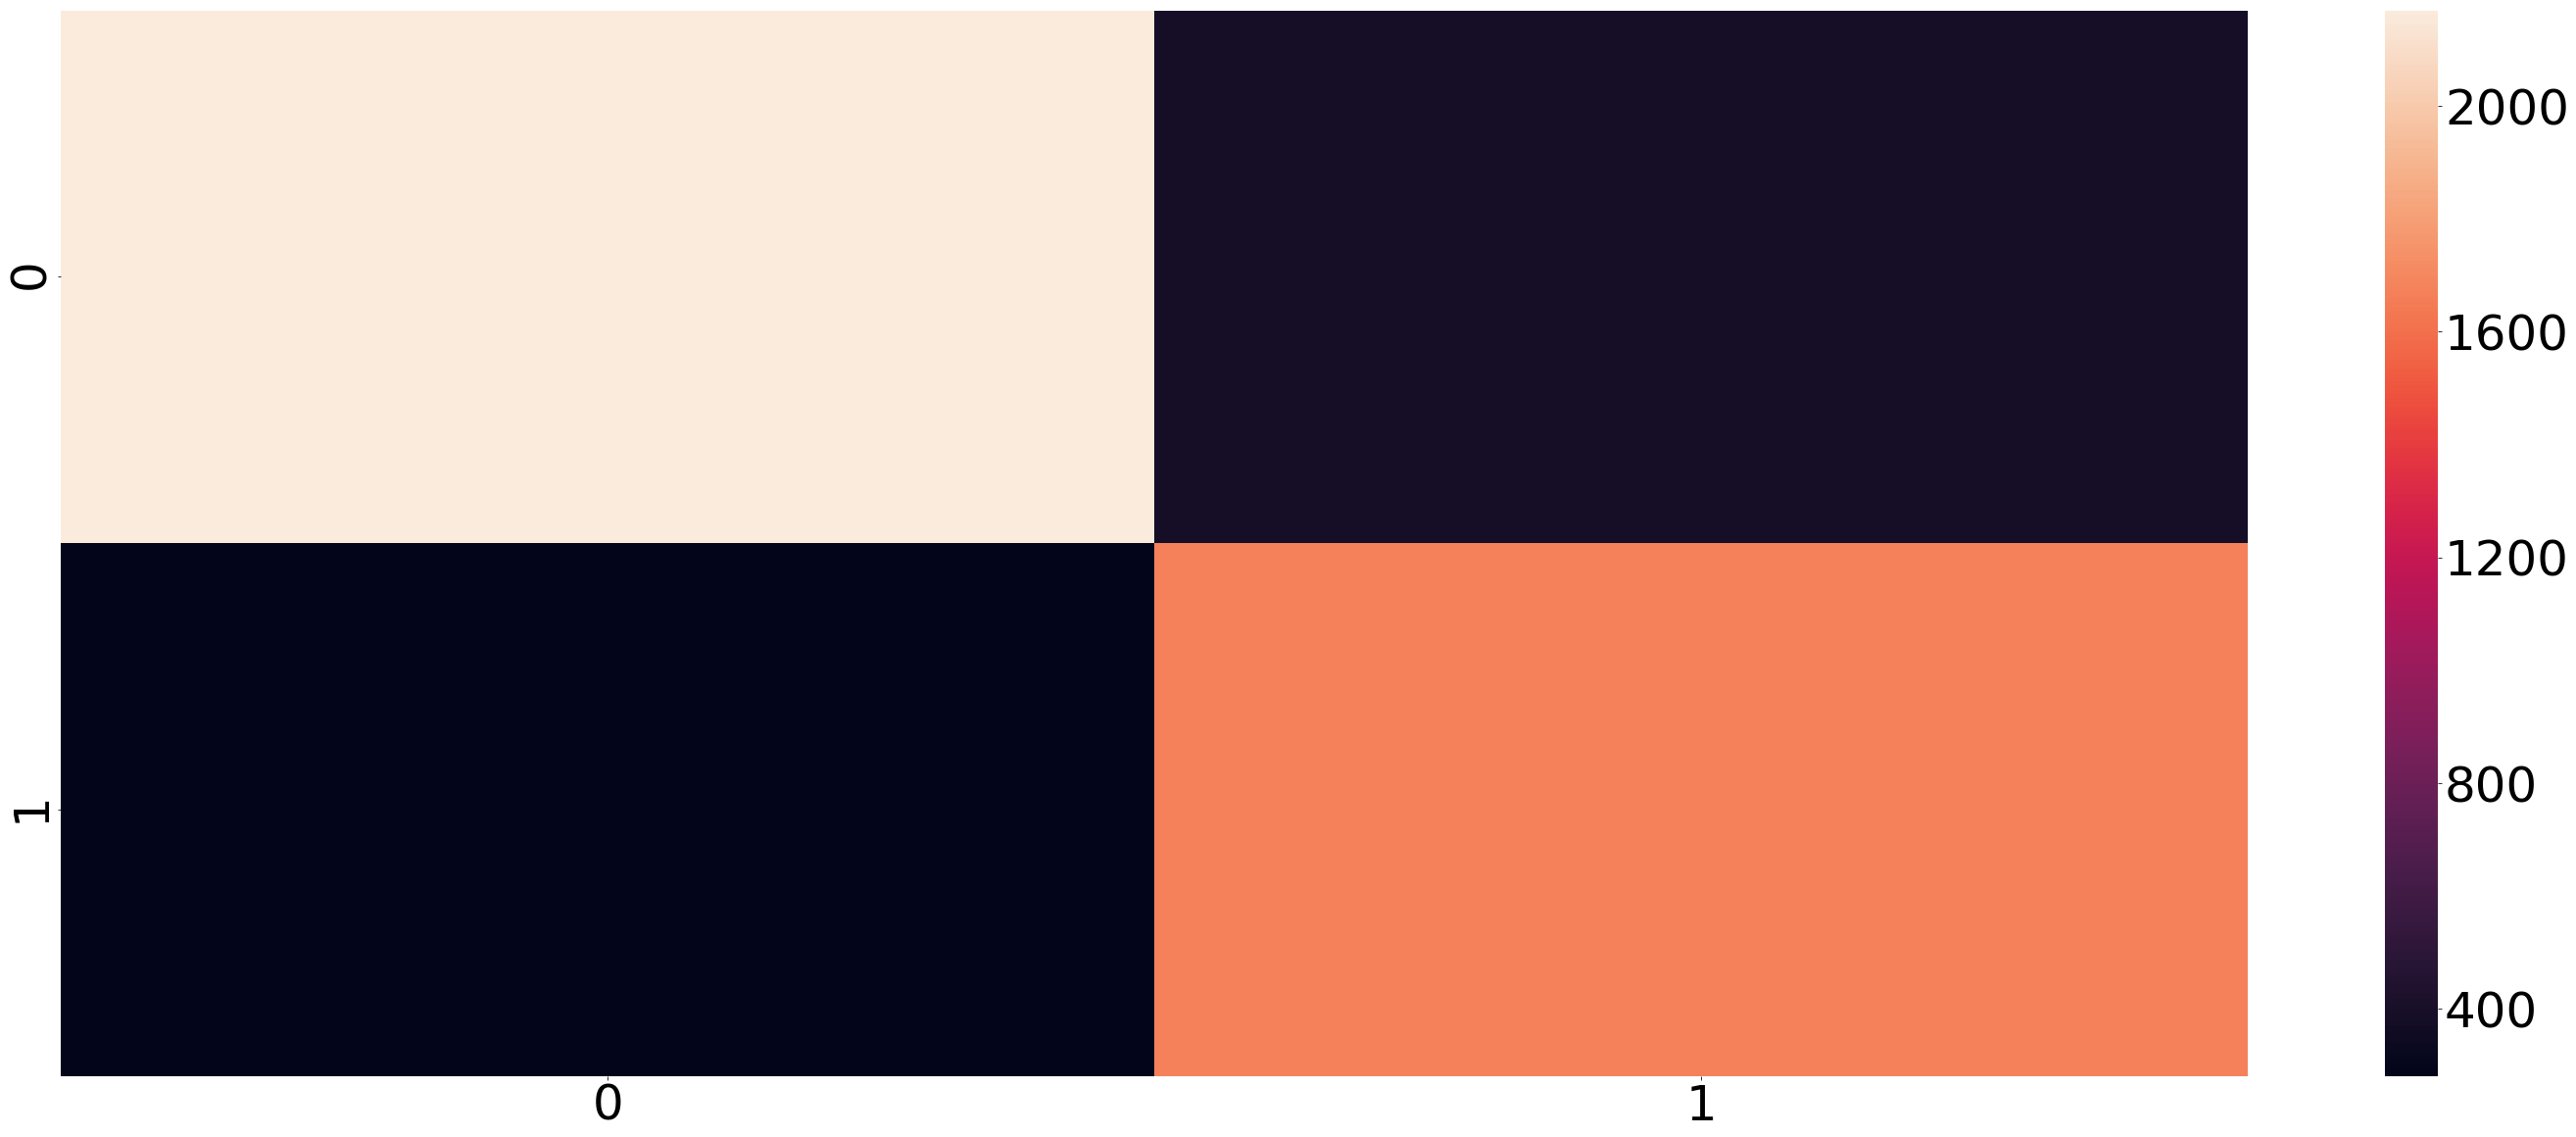

In [77]:
lsvc_final = grid3.best_estimator_

tmp_pred_rf = lsvc_final.fit(x_train,y_train)
pr1 = lsvc_final.predict(x_test)
confusion_matrix1 =confusion_matrix(y_test,pr1)
print (confusion_matrix1)
sns.heatmap(confusion_matrix1)
print ("Precision score "+str(precision_score(y_test,pr1)))
print ("Recall score "+str(recall_score(y_test,pr1)))
print ("F1 score "+str(f1_score(y_test,pr1)))

In [78]:
parameters = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              #'max_features': [1.0, 0.3, 0.1] 
              }

grid4 = GridSearchCV(GradientBoostingClassifier(), parameters,verbose=2, cv=10, n_jobs=-1)

grid4.fit(x_train, y_train)
print (grid4.best_estimator_)


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 12.3min finished
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=20, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[2518   42]
 [  56 1893]]
Precision score 0.9782945736434109
Recall score 0.9712673165726013
F1 score 0.9747682801235841


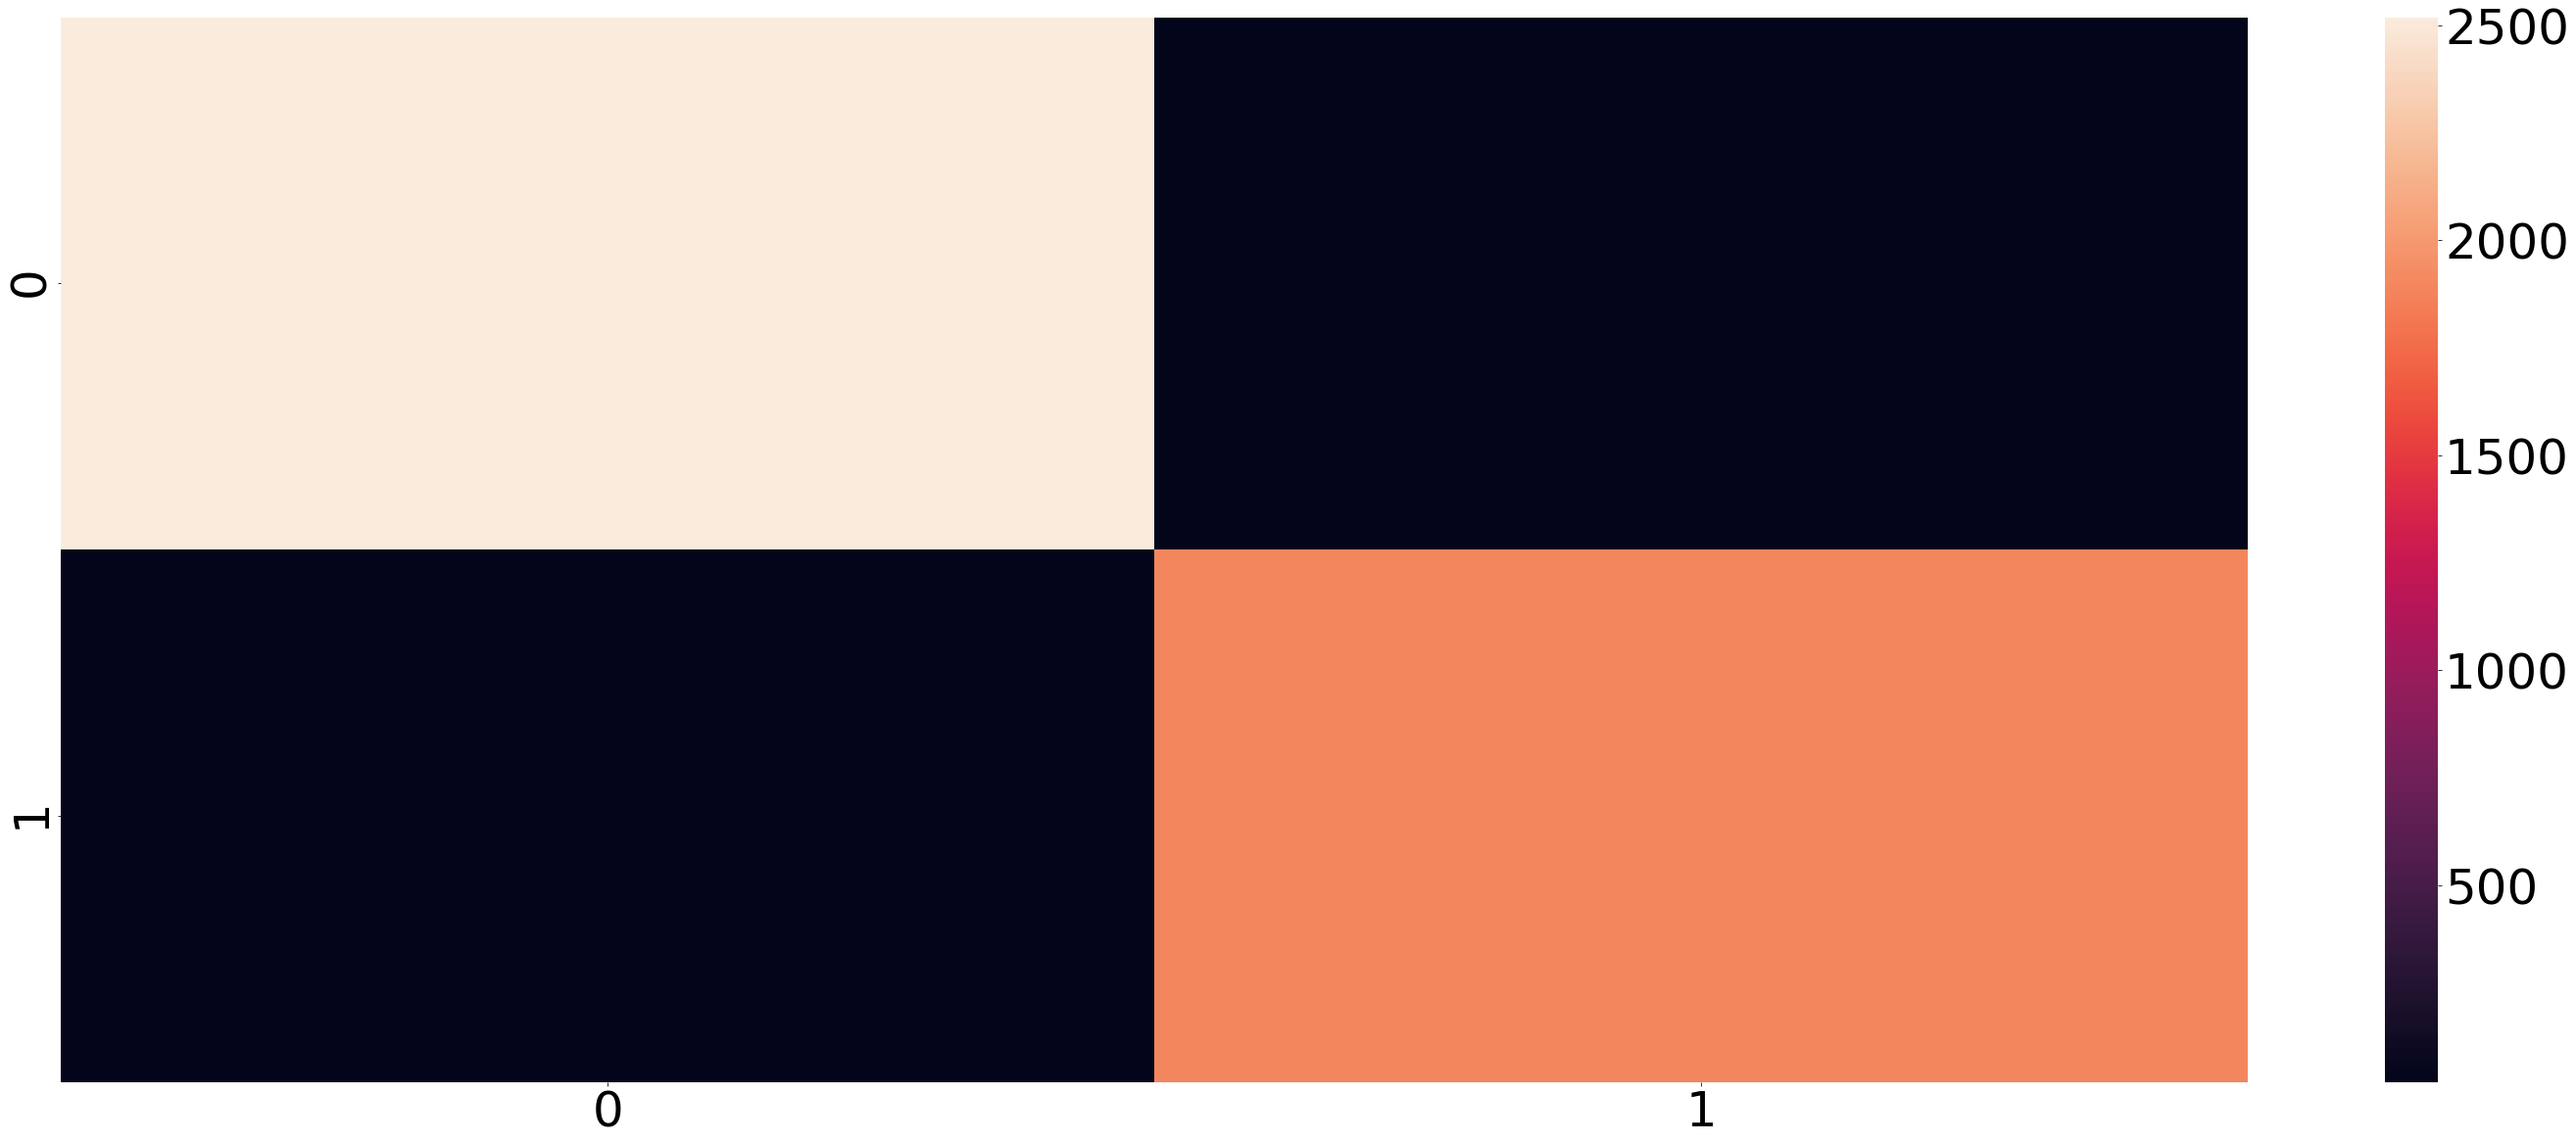

In [79]:
gb_final = grid4.best_estimator_

tmp_pred = gb_final.fit(x_train,y_train)
pr1 = tmp_pred.predict(x_test)
confusion_matrix1 =confusion_matrix(y_test,pr1)
print (confusion_matrix1)
print ("Precision score "+str(precision_score(y_test,pr1)))
print ("Recall score "+str(recall_score(y_test,pr1)))
print ("F1 score "+str(f1_score(y_test,pr1)))
sns.heatmap(confusion_matrix1)

In [80]:
learning_rate1= [0.1, 0.05, 0.02, 0.01]
max_depth1= [4, 6, 8]
min_samples_leaf1= [20, 50,100,150]

ACP1=[]
for item in learning_rate1:
    model1 = GradientBoostingClassifier(learning_rate=item)
    model1.fit(x_train,y_train)
    ACP1.append(model1.score(x_test,y_test))
    print(item)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.05


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.02


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.01


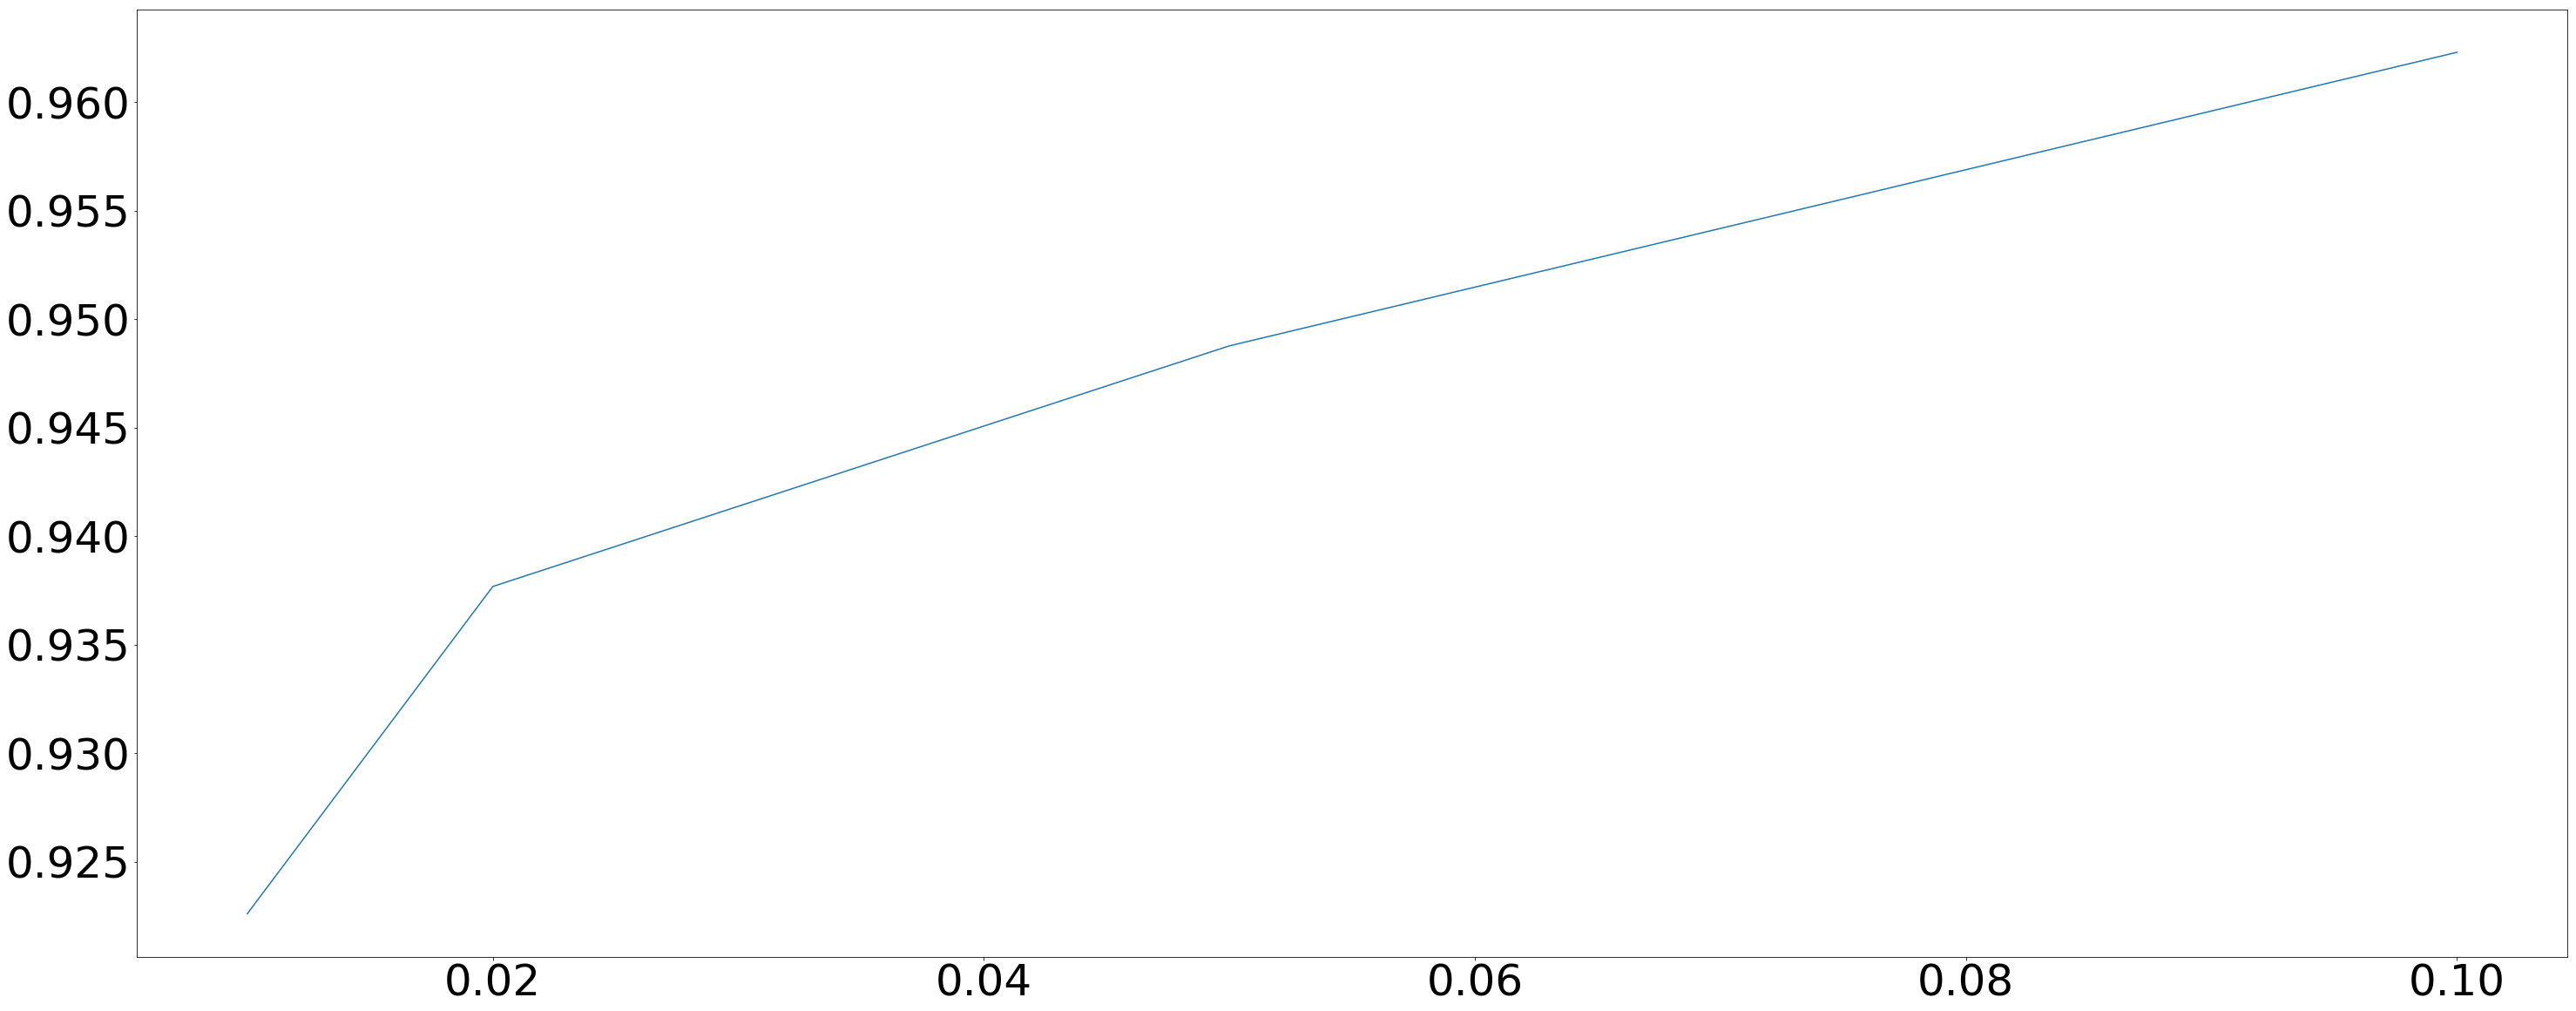

In [81]:
plt.plot(learning_rate1,ACP1)

In [82]:
ACP1

[0.9622976269682857, 0.948769128409847, 0.937680195165225, 0.9225992459525394]

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8


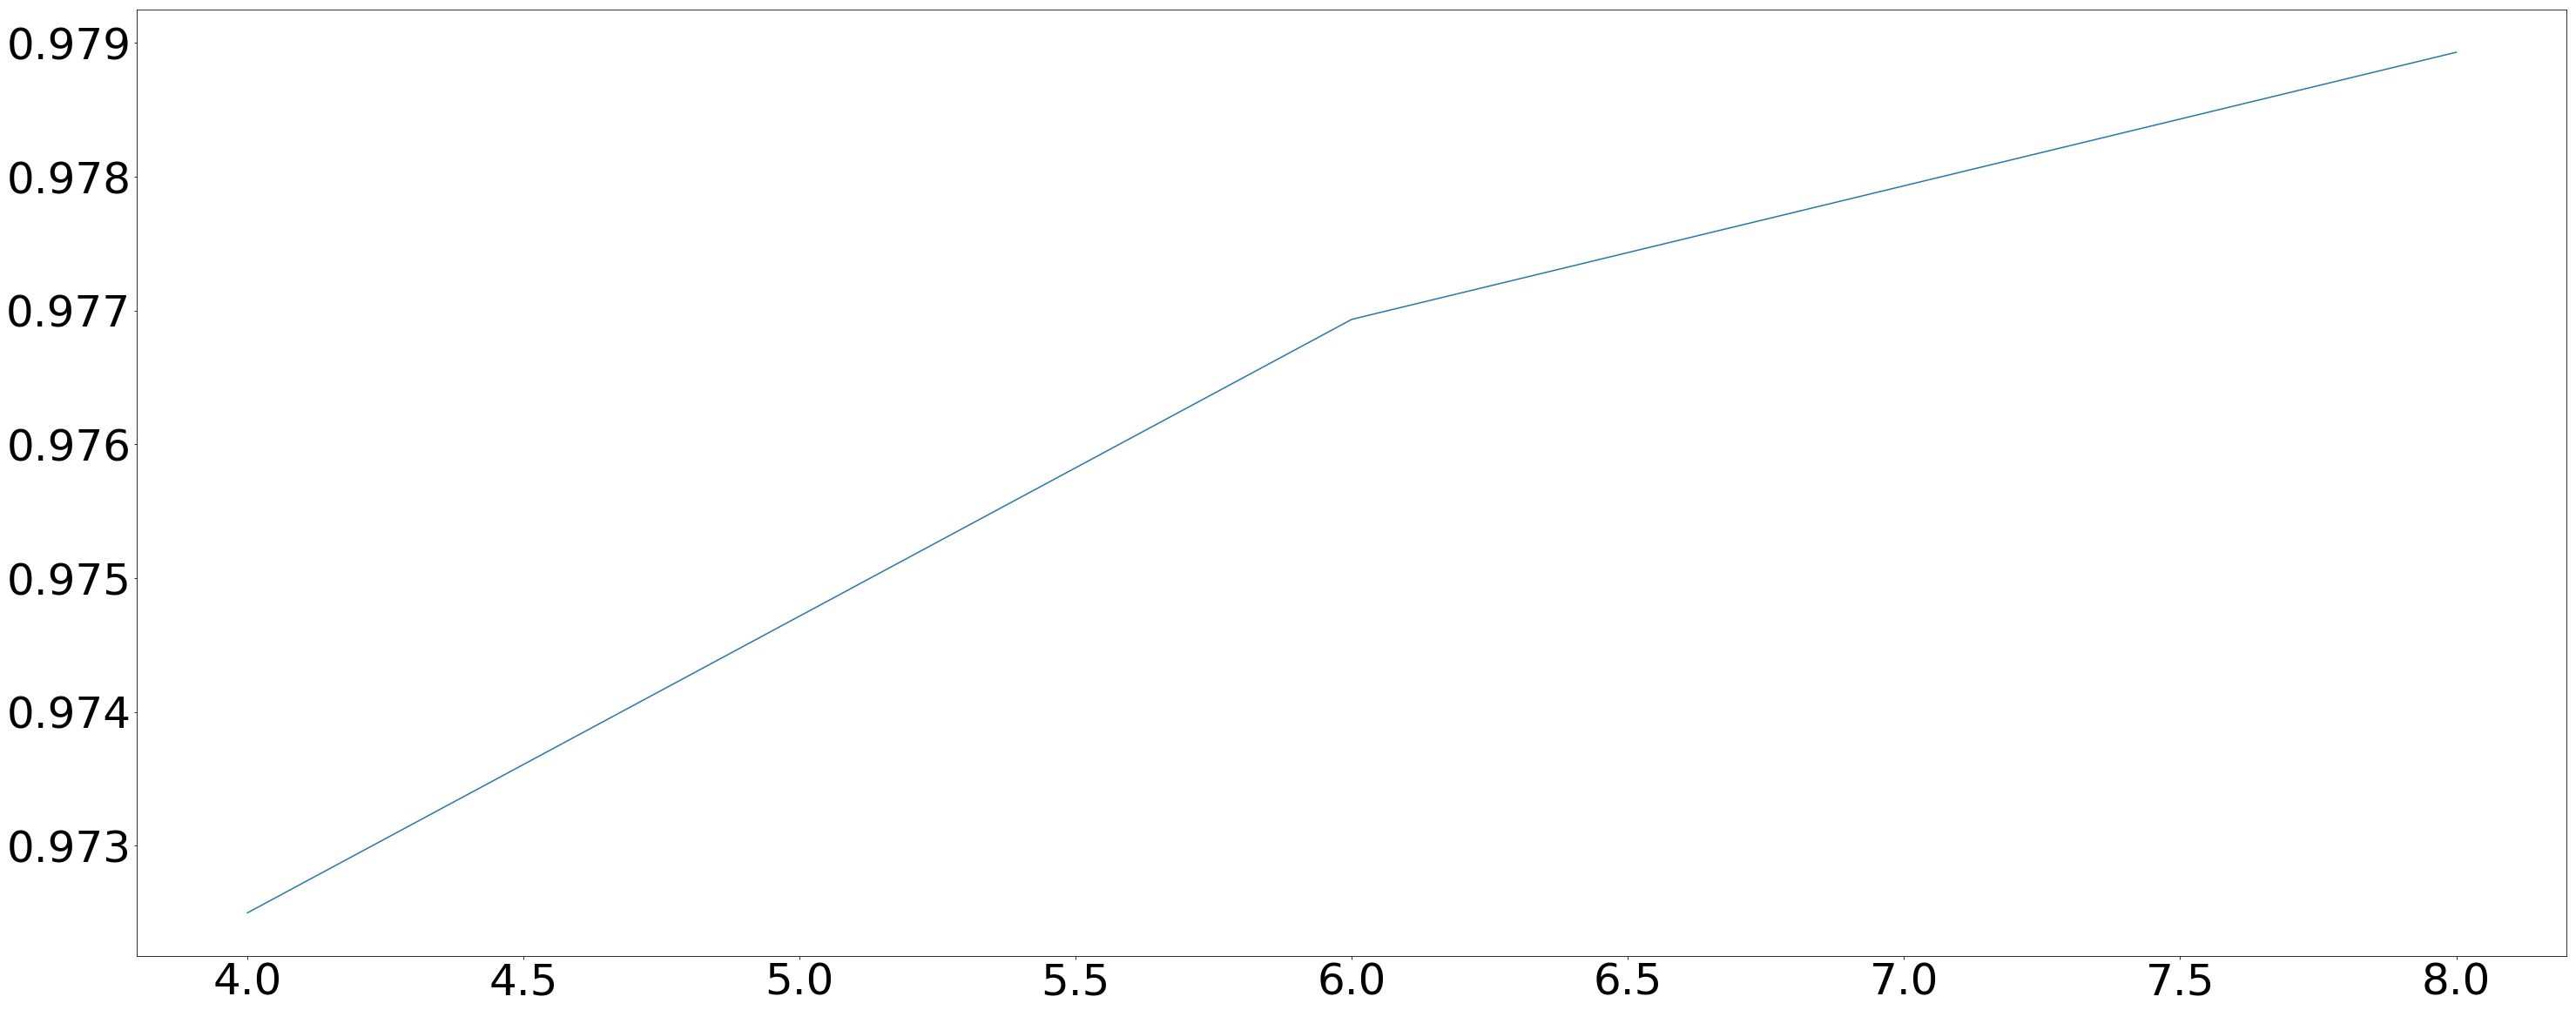

In [83]:
learning_rate1= [0.1, 0.05, 0.02, 0.01]
max_depth1= [4, 6, 8]
min_samples_leaf1= [20, 50,100,150]

ACP2=[]
for item in max_depth1:
    model2 = GradientBoostingClassifier(max_depth=item)
    model2.fit(x_train,y_train)
    ACP2.append(model2.score(x_test,y_test))
    print(item)
plt.plot(max_depth1,ACP2)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


50


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


150


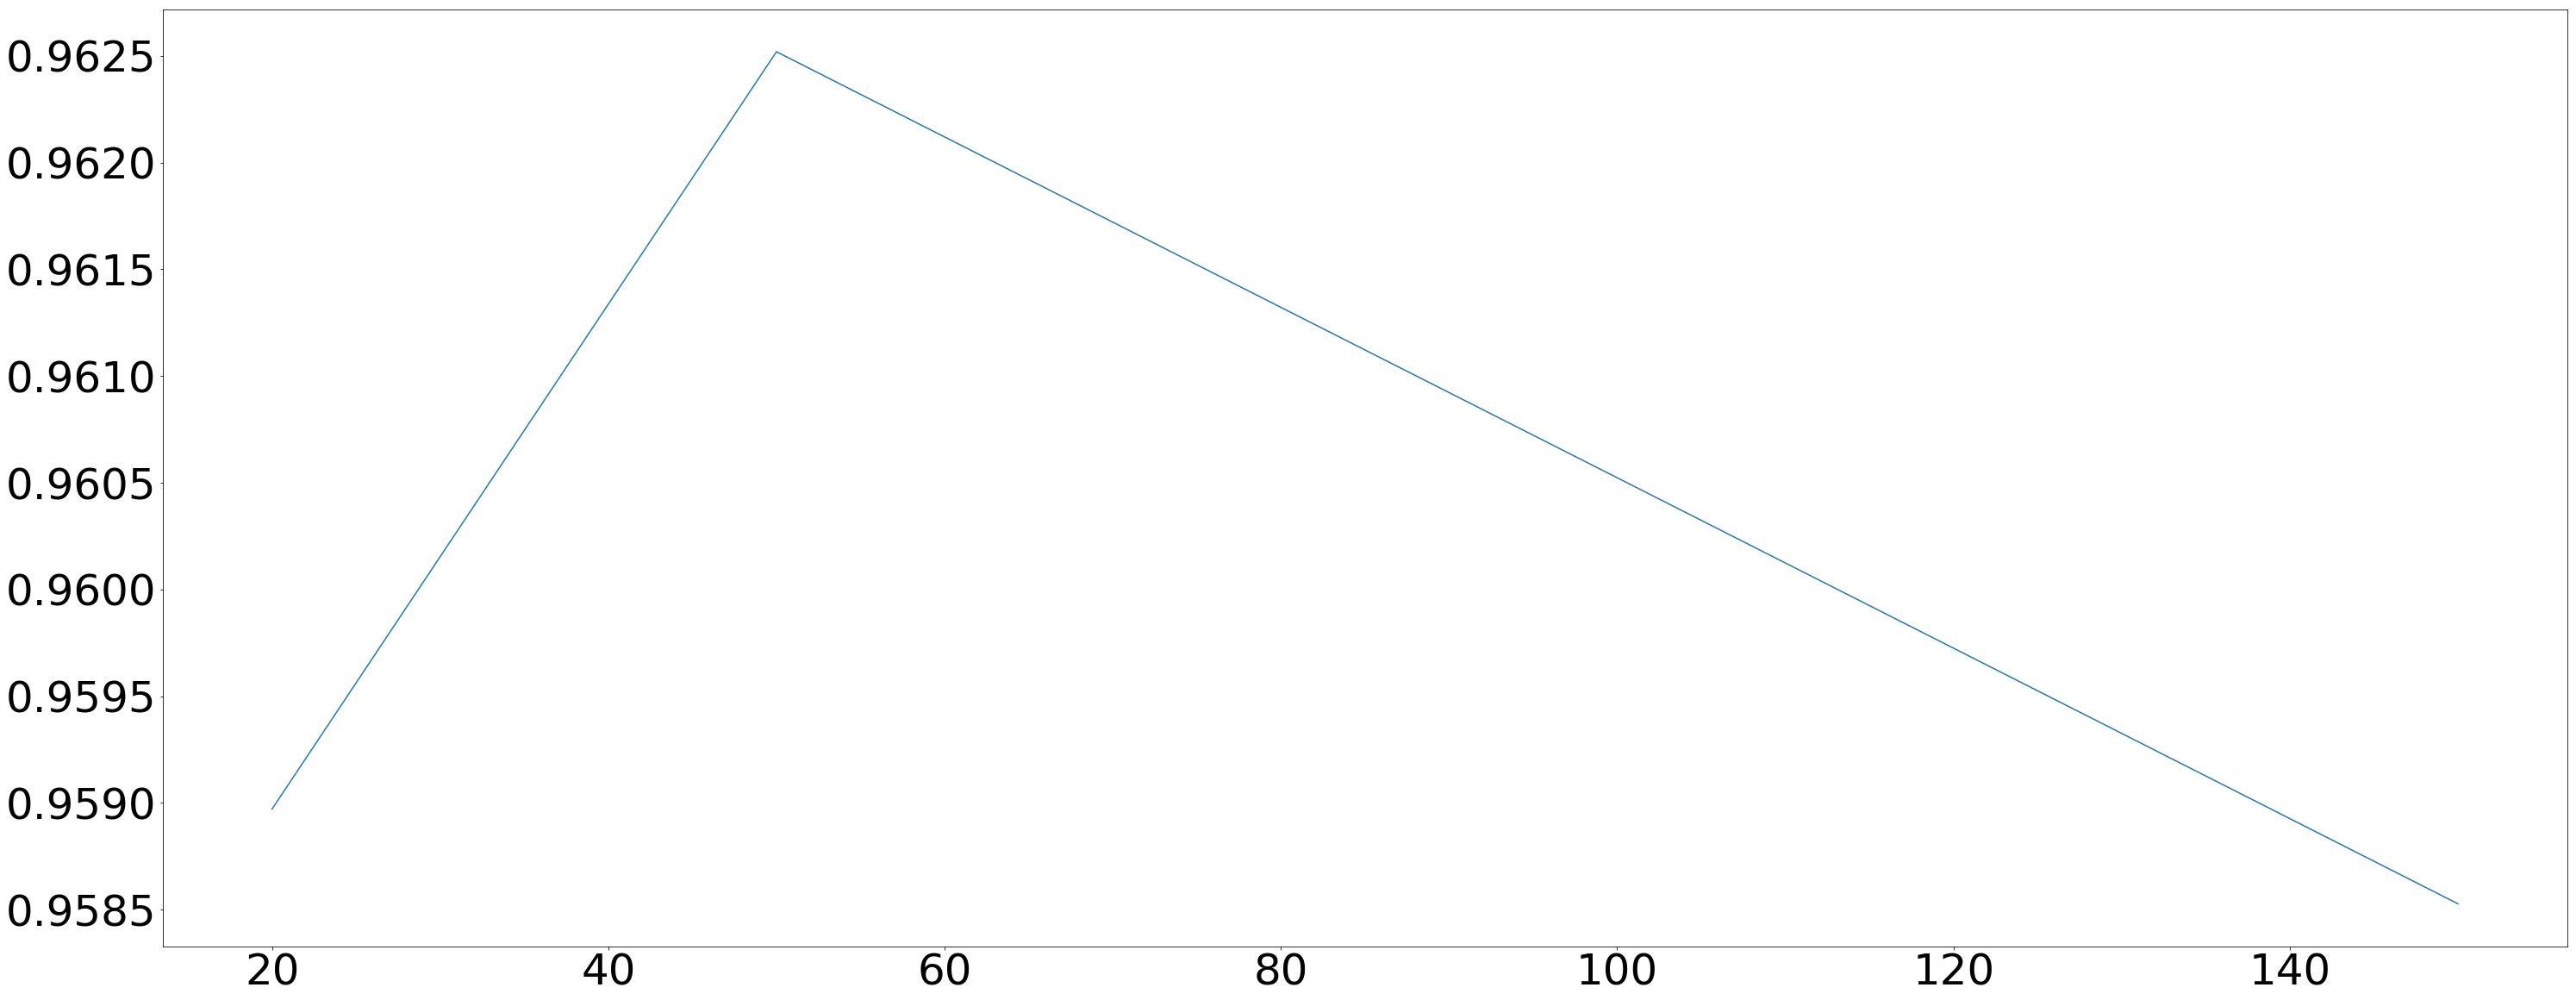

In [84]:
learning_rate1= [0.1, 0.05, 0.02, 0.01]
max_depth1= [4, 6, 8]
min_samples_leaf1= [20, 50,100,150]

ACP3=[]
for item in min_samples_leaf1:
    model3 = GradientBoostingClassifier(min_samples_leaf=item)
    model3.fit(x_train,y_train)
    ACP3.append(model3.score(x_test,y_test))
    print(item)
plt.plot(min_samples_leaf1,ACP3)

In [85]:
print (gb_final)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=20, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [86]:
# Define the parameter values that should be searched
sample_split_range = list(range(2, 50))

# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
param_grid = dict(min_samples_split=sample_split_range)
dtc = DecisionTreeClassifier()
# instantiate the grid
grid5 = GridSearchCV(dtc, param_grid, cv=10,n_jobs=-1,verbose=2, scoring='accuracy')

# fit the grid with data
grid5.fit(x_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   11.2s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14,

[[2522   38]
 [  67 1882]]
Precision score 0.9802083333333333
Recall score 0.965623396613648
F1 score 0.9728612044455931


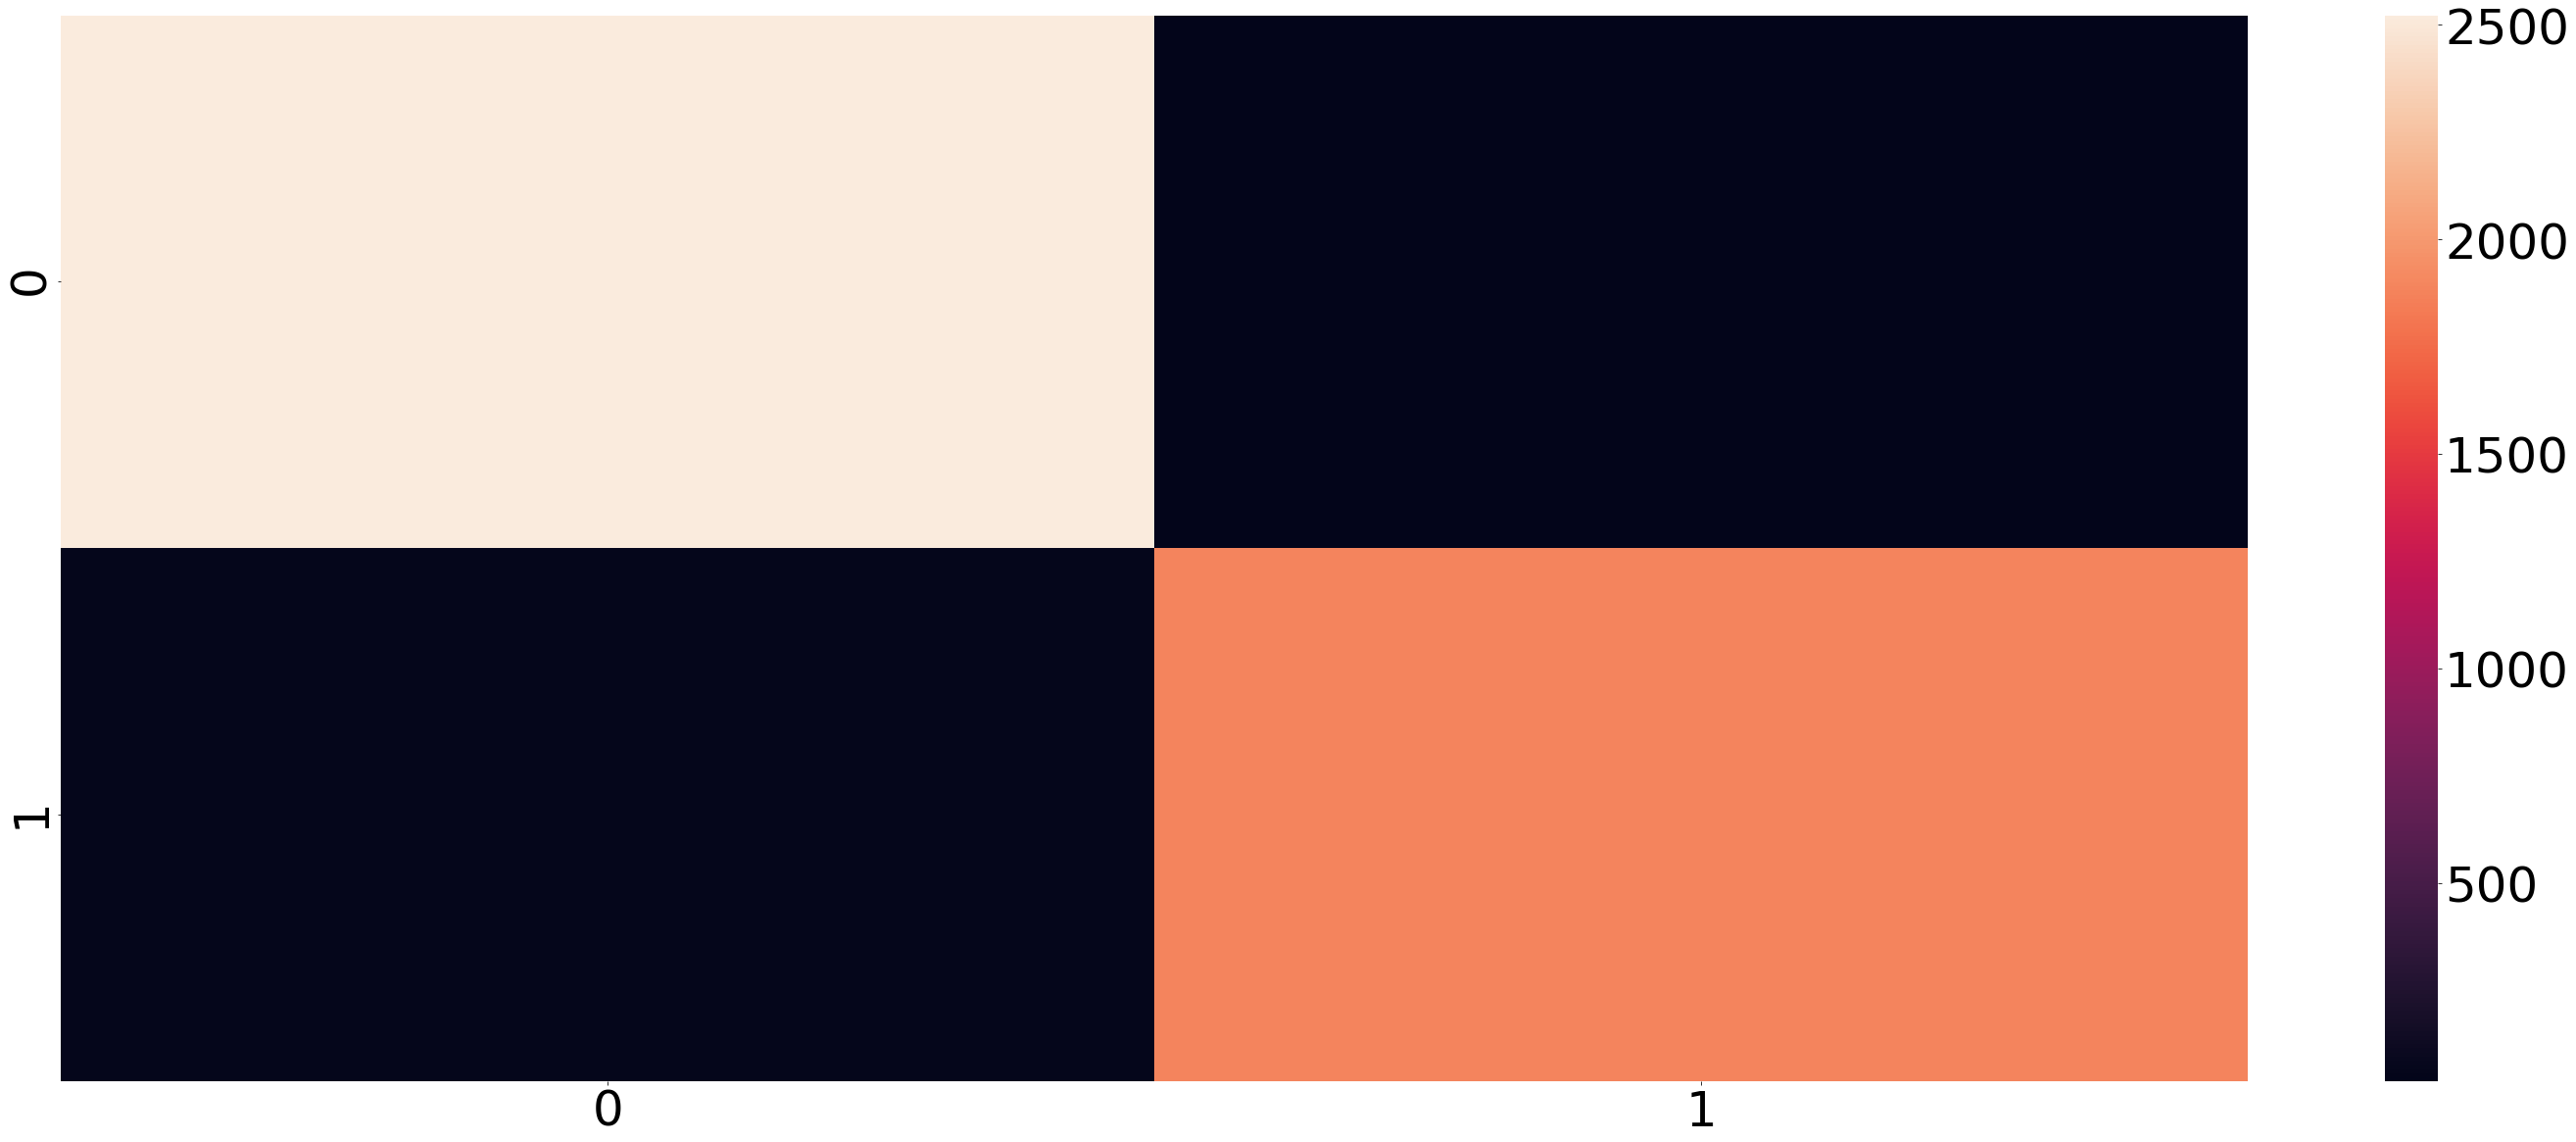

In [87]:
dt_final = grid5.best_estimator_
tmp_pred = dt_final.fit(x_train,y_train)
pr1 = tmp_pred.predict(x_test)
confusion_matrix1 =confusion_matrix(y_test,pr1)
print (confusion_matrix1)
sns.heatmap(confusion_matrix1)
print ("Precision score "+str(precision_score(y_test,pr1)))
print ("Recall score "+str(recall_score(y_test,pr1)))
print ("F1 score "+str(f1_score(y_test,pr1)))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


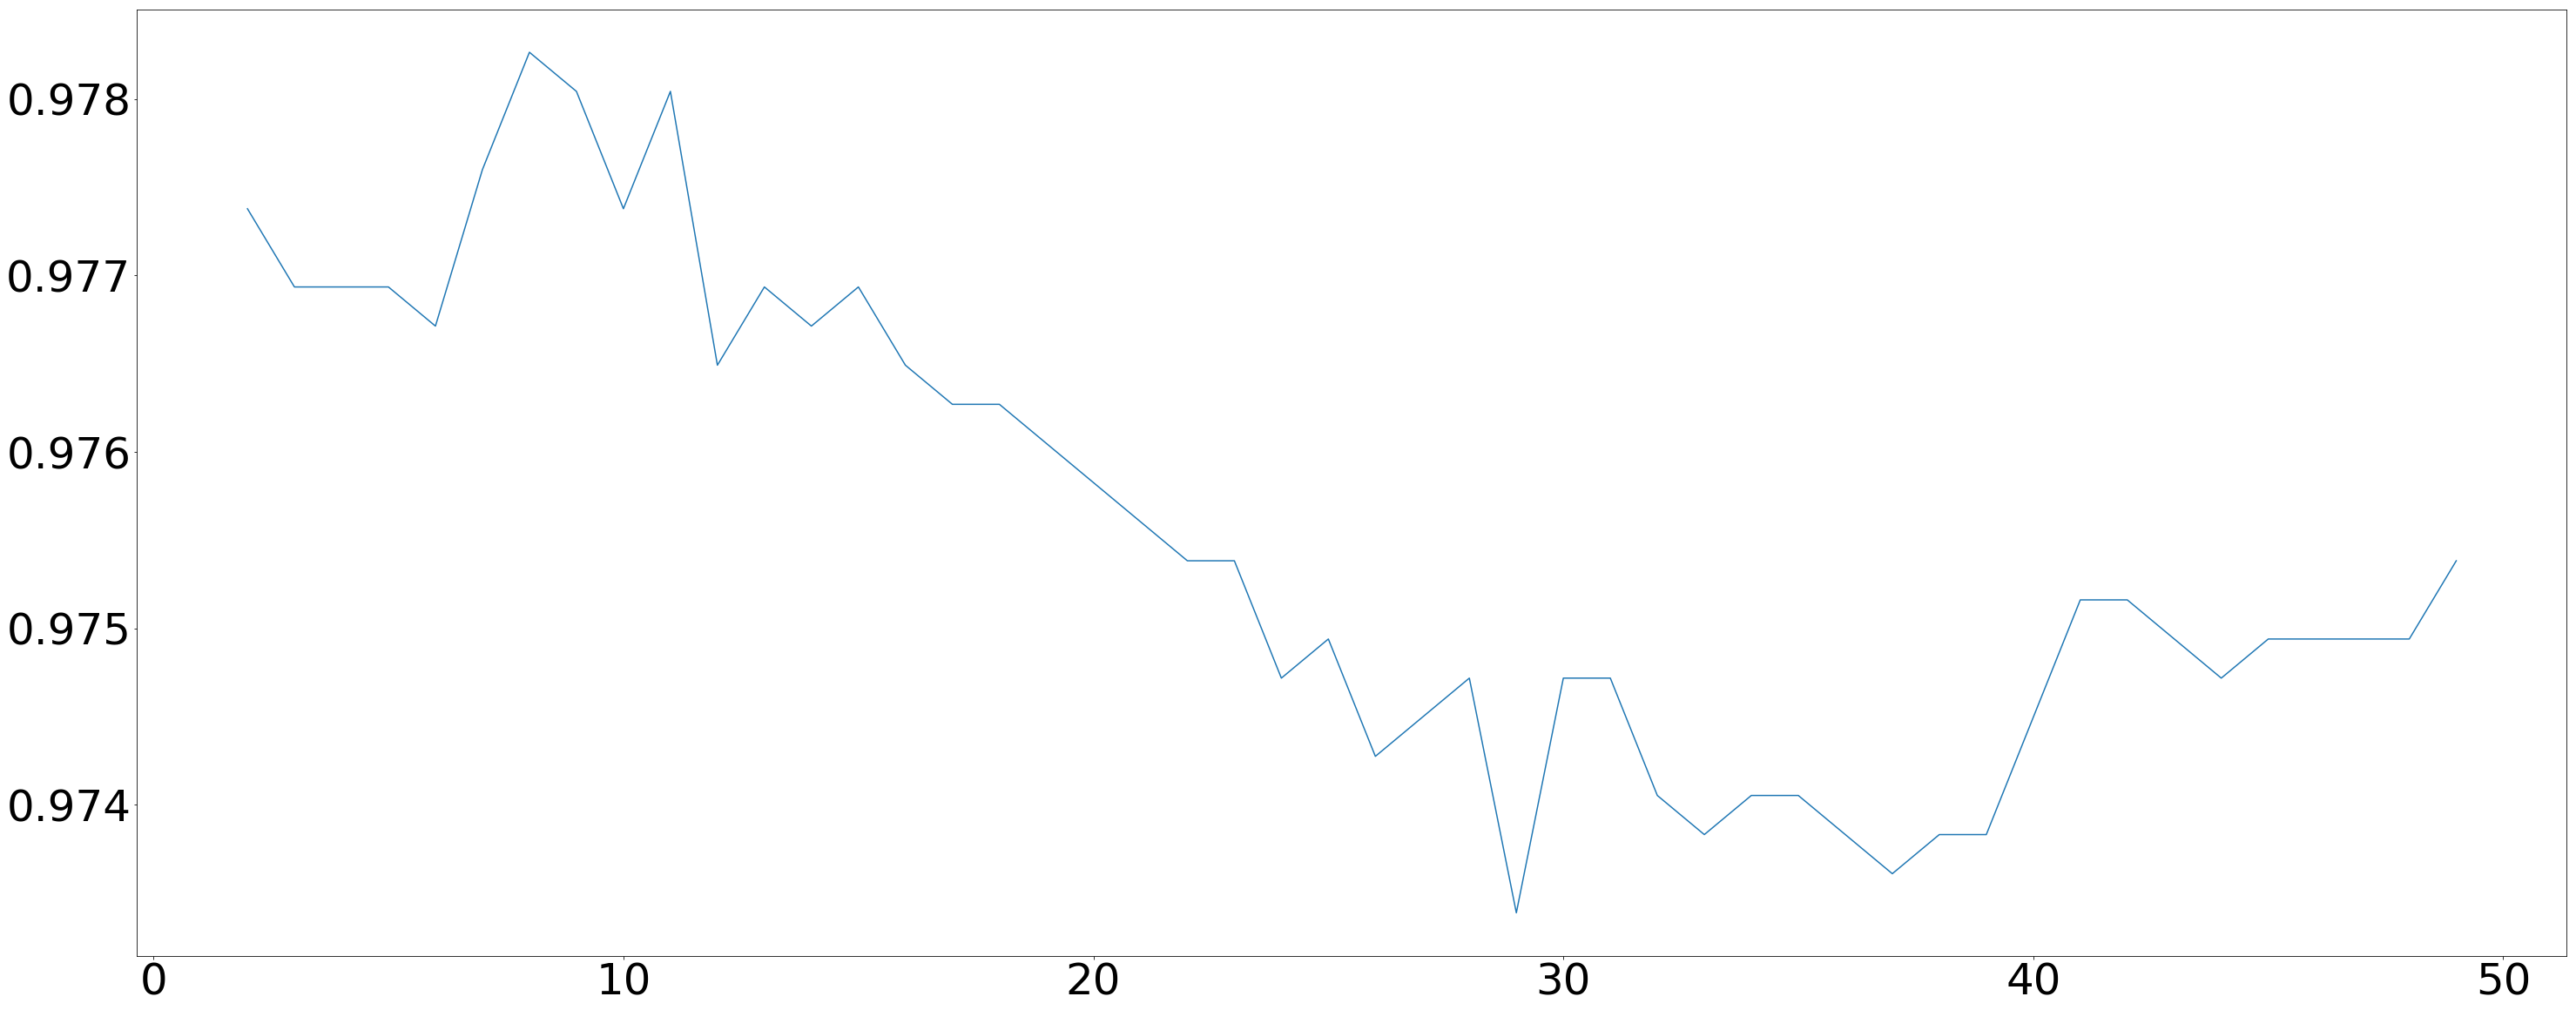

In [88]:
min_sample_split1=list(range(2, 50))

ACP4=[]
for item in min_sample_split1:
    model4 = DecisionTreeClassifier(min_samples_split=item)
    model4.fit(x_train,y_train)
    ACP4.append(model4.score(x_test,y_test))
    print(item)
plt.plot(min_sample_split1,ACP4)

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
ML=[]
M=['DecisionTreeClassifier','KNeighborsRegressor','SVC','LinearSVC','RandomForestRegressor','GradientBoostingClassifier']
Z=[gb_final,knn_final,svc_final,lsvc_final,rf_final,gb_final]
##new
#M=['DecisionTreeClassifier','KNeighborsRegressor','SVC']
#Z=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]

In [90]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

##new
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier# Using pipeline for applying logistic regression and one vs rest classifier
from sklearn.multioutput import MultiOutputClassifier
for model in Z:
    
    ##new
    models=MultiOutputClassifier(model)
    ##new
    models.fit(x_train1,y_train1)      ## training the model this could take a little time
    accuracy=models.score(x_test1,y_test1)    ## comparing result with the test data set
    ML.append(accuracy) 


(18035, 17)
(18035, 1)
(4509, 17)
(4509, 1)


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWar

In [91]:
ML

[0.9687292082501663,
 0.9532047017076957,
 0.9405633178088267,
 0.674428919937902,
 0.9667332002661344,
 0.9687292082501663]

In [92]:
d={'Accuracy':ML,'Algorithm':M}
df1=pd.DataFrame(d)

In [93]:
df1

,Accuracy,Algorithm
0,0.968729,DecisionTreeClassifier
1,0.953205,KNeighborsRegressor
2,0.940563,SVC
3,0.674429,LinearSVC
4,0.966733,RandomForestRegressor
5,0.968729,GradientBoostingClassifier


## LinearSVC failrd to predict cause its genarelly used for linearly genarated data ommiting this
## making combined classifier but ommiting the LSVC
## combined will use hard voting for selection

In [94]:
from sklearn.ensemble import VotingClassifier
voting_clf = MultiOutputClassifier(VotingClassifier(estimators=[('knn',knn_final),('rf',rf_final),('dt',dt_final),('svc',svc_final),('gb',gb_final)],voting='hard'))

In [95]:
voting_clf.fit(x_train1,y_train1)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


MultiOutputClassifier(estimator=VotingClassifier(estimators=[('knn',
                                                              KNeighborsClassifier(algorithm='auto',
                                                                                   leaf_size=30,
                                                                                   metric='minkowski',
                                                                                   metric_params=None,
                                                                                   n_jobs=None,
                                                                                   n_neighbors=4,
                                                                                   p=2,
                                                                                   weights='distance')),
                                                             ('rf',
                                                              RandomFore

In [96]:
predicted=voting_clf.predict(x_test1)

In [97]:
print (predicted)
#tmp_pred = gb_final.fit(x_train,y_train)
#pr1 = tmp_pred.predict(x_test)


[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 1]
 [0 1]]


In [98]:
cf1_d=[]
cf2_d=[]
for item in predicted:
    cf1_d.append(item[0])
for item in predicted:
    cf2_d.append(item[1])
    


In [99]:
y_test1

,num_class,num_proto
13056,1,1
21577,1,1
19386,1,1
11567,0,1
10753,0,0
1862,1,1
11016,1,1
3791,1,1
14082,1,1
19601,1,1


In [100]:
voting_hybrid_classifier=voting_clf.score(x_test1,y_test1)

[[2543   42]
 [  63 1861]]
Precision score 0.977929584866001
Recall score 0.9672557172557172
F1 score 0.9725633655604912


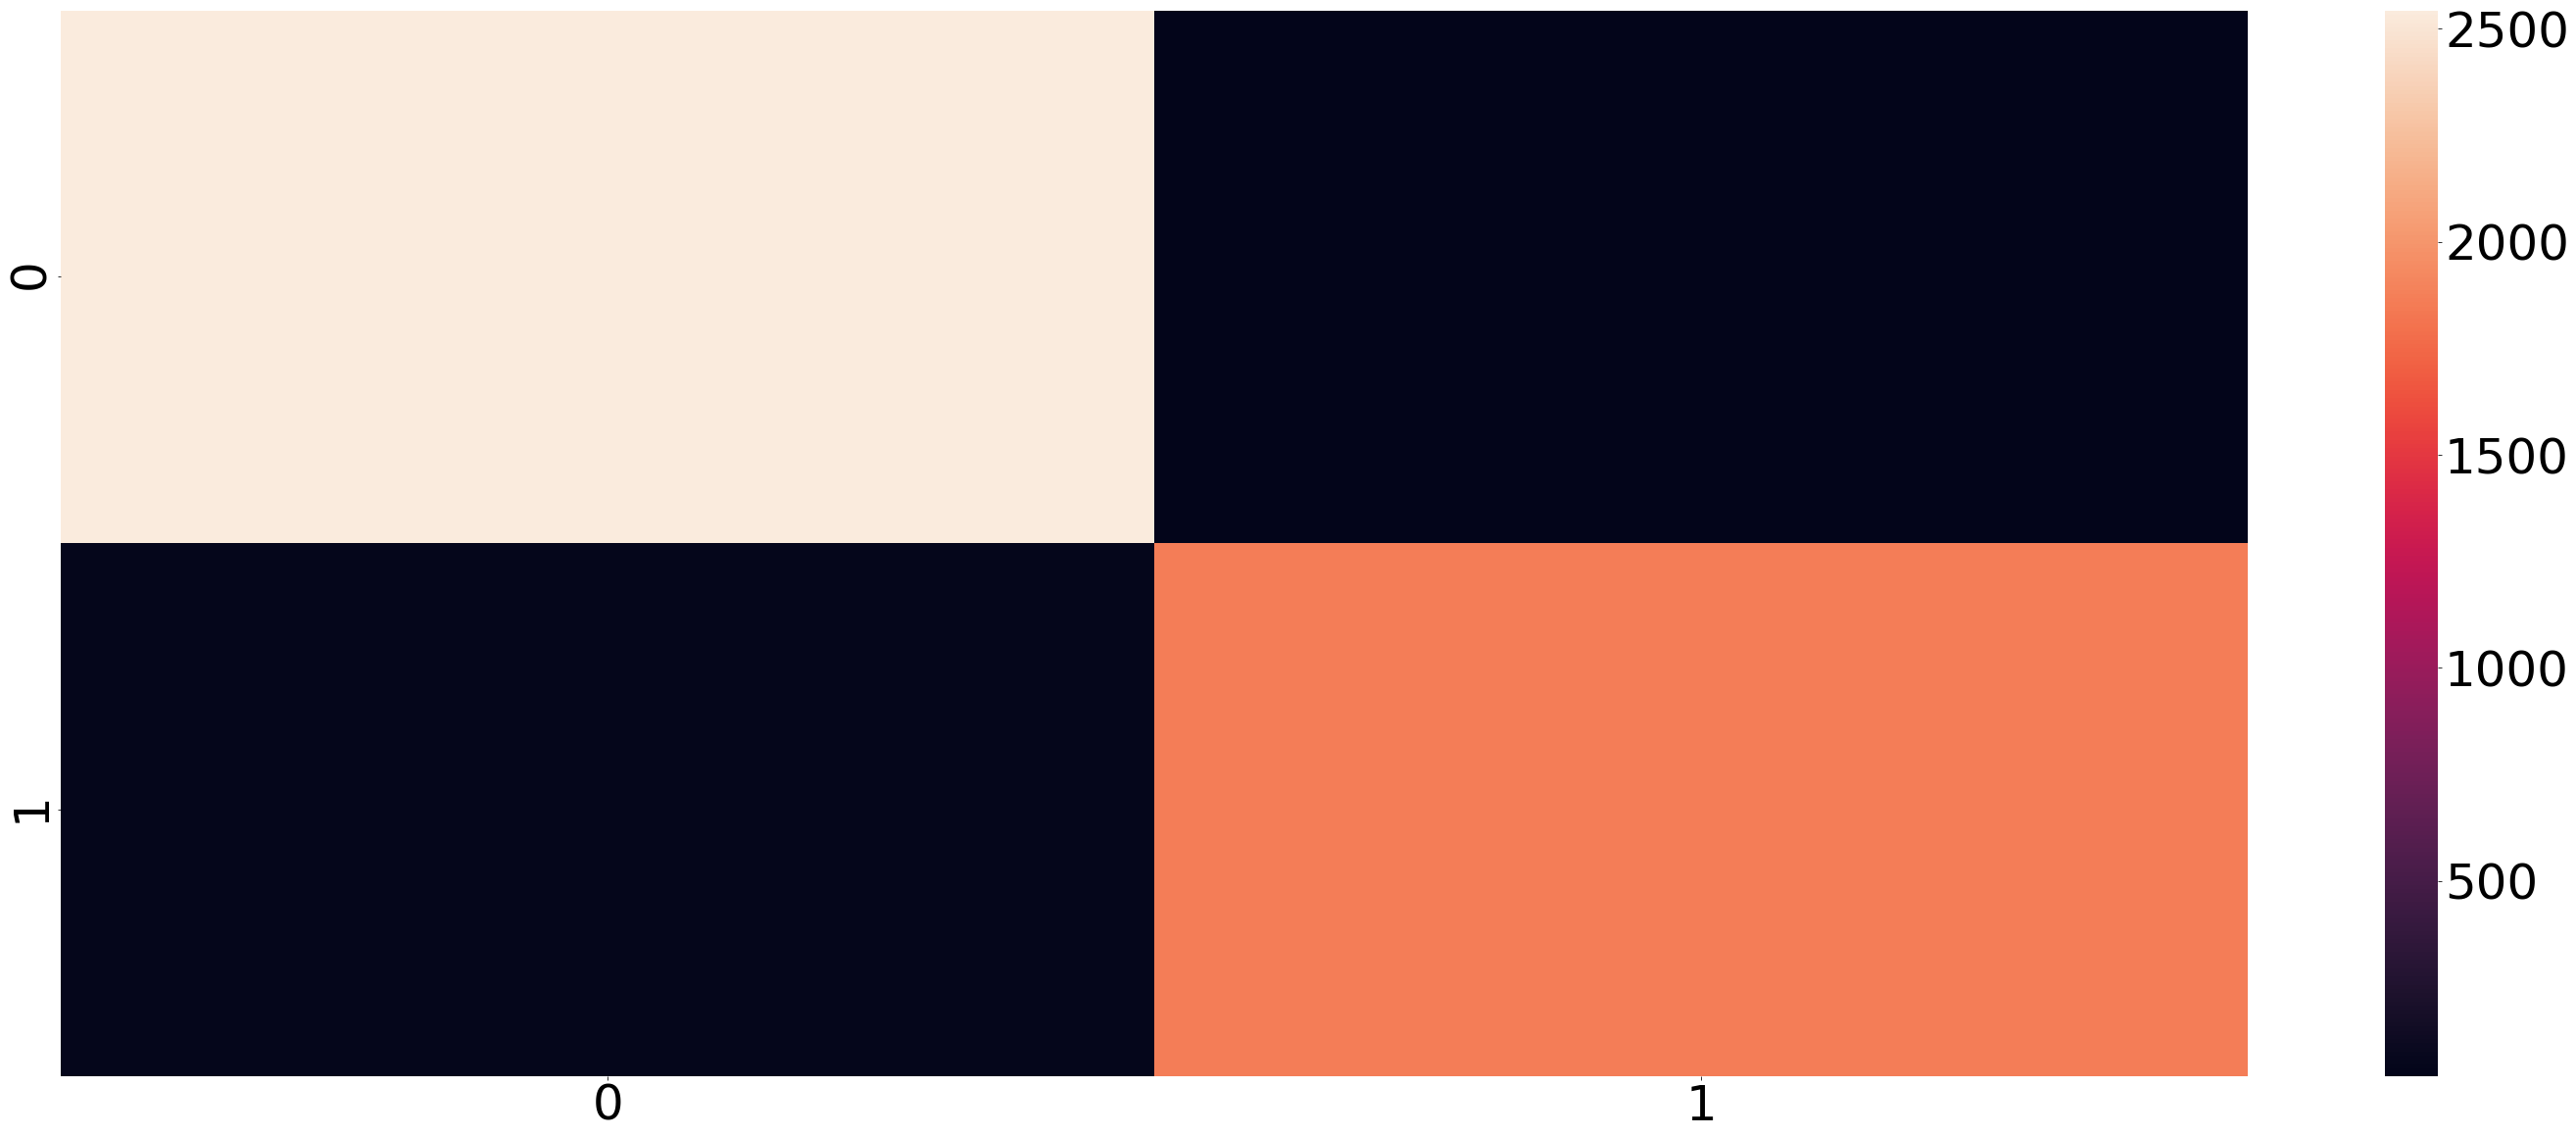

In [101]:

confusion_matrix1 =confusion_matrix(np.array(y_test1['num_class']),np.array(cf1_d))
#confusion_matrix2 =confusion_matrix(y_test,pr1)

print (confusion_matrix1)
print ("Precision score "+str(precision_score(np.array(y_test1['num_class']),np.array(cf1_d))))
print ("Recall score "+str(recall_score(np.array(y_test1['num_class']),np.array(cf1_d))))
print ("F1 score "+str(f1_score(np.array(y_test1['num_class']),np.array(cf1_d))))
#print (confusion_matrix2)

sns.heatmap(confusion_matrix1)

[[ 182    6    4]
 [  18 3772    2]
 [  13    9  503]]
Precision score 0.9884675094255932
Recall score 0.9884675094255932
F1 score 0.9884675094255932


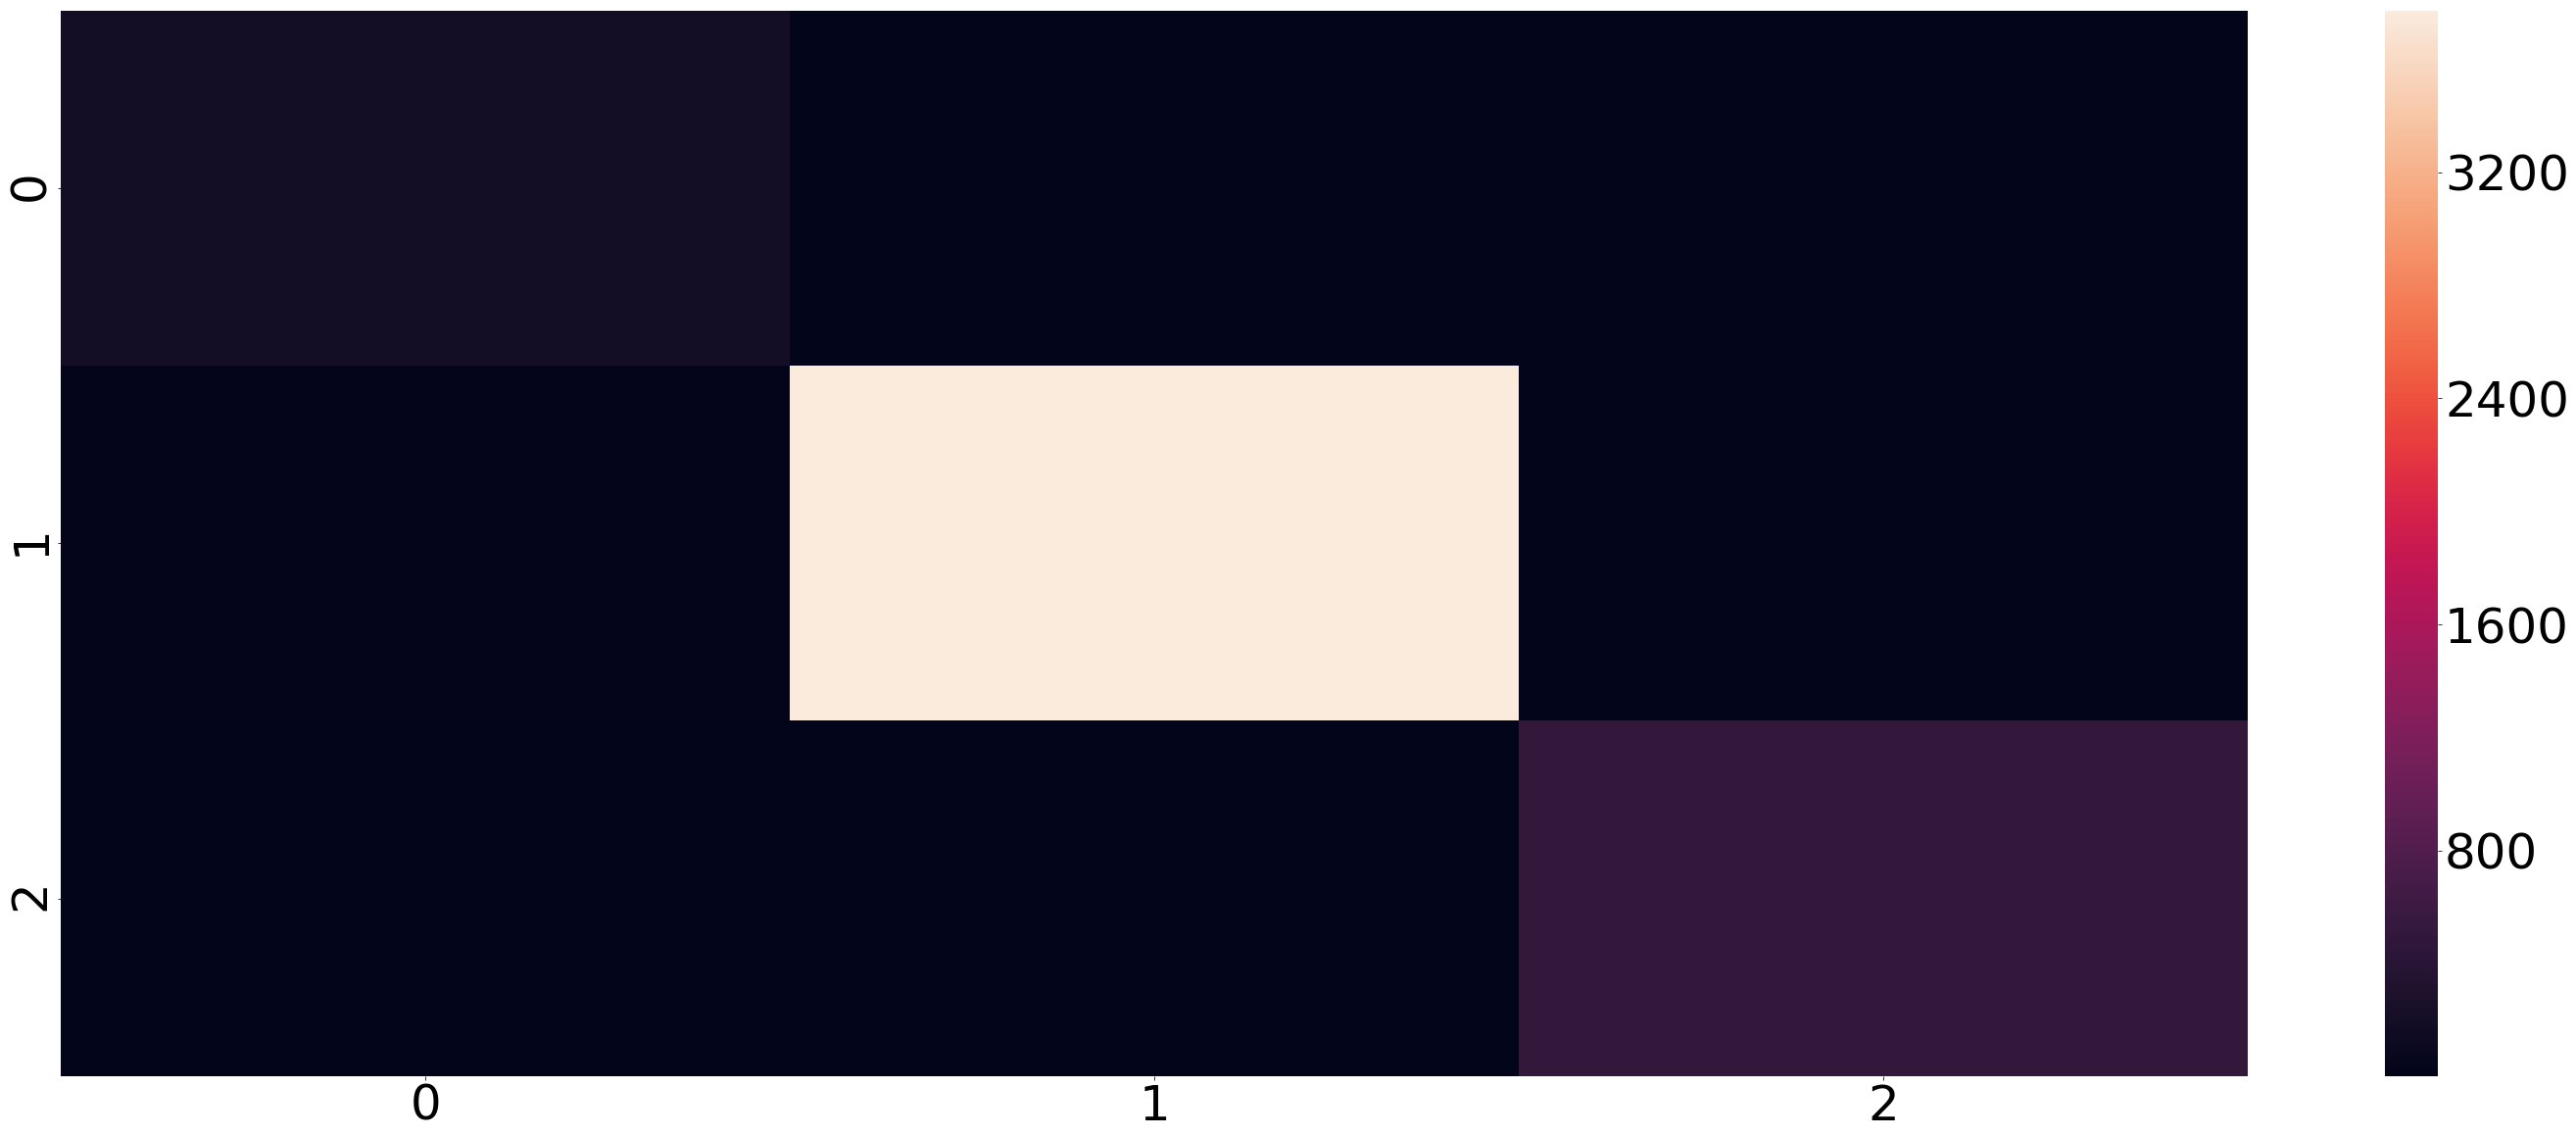

In [108]:
confusion_matrix2 =confusion_matrix(np.array(y_test1['num_proto']),np.array(cf2_d))
#confusion_matrix2 =confusion_matrix(y_test,pr1)

print (confusion_matrix2)
print ("Precision score "+str(precision_score(np.array(y_test1['num_proto']),np.array(cf2_d),average='micro')))
print ("Recall score "+str(recall_score(np.array(y_test1['num_proto']),np.array(cf2_d),average='micro')))
print ("F1 score "+str(f1_score(np.array(y_test1['num_proto']),np.array(cf2_d),average='micro')))
#print (confusion_matrix2)

sns.heatmap(confusion_matrix2)

# Primary validation shows 97.6 % accuracy

In [109]:
## mse
from sklearn.metrics import mean_squared_error

In [110]:
mse = mean_squared_error(y_test1,predicted)

In [111]:
mse

0.023064981148813484

# going for cross val comparison for more accurate evaluation

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
print(cross_val_score(voting_clf, x_test1, y_test1, cv=3))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

[0.9574185  0.95542249 0.95409182]


## 3 for split we get more than 95 % accuracy so we dont have overfitting problem

# going for 10 split

In [114]:
print(cross_val_score(voting_clf, x_test1, y_test1, cv=10))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

[0.95121951 0.96895787 0.96674058 0.94900222 0.95343681 0.96895787
 0.9578714  0.97117517 0.94900222 0.95333333]


##  for 10 split we get more than 94 % accuracy so we definitly  dont have overfitting problem

In [115]:
voting_hybrid_classifier

0.9680638722554891

In [116]:
#df1=df1.drop('hybrid_voting_Classifier',axis=1)

In [117]:
ML.append(voting_hybrid_classifier)

In [118]:
M=['DecisionTreeClassifier','KNeighborsRegressor','SVC','LinearSVC','RandomForestRegressor','GradientBoostingClassifier','hybrid_voting_classifier']
d={'Accuracy':ML,'Algorithm':M}
df1=pd.DataFrame(d)

In [119]:
df1

,Accuracy,Algorithm
0,0.968729,DecisionTreeClassifier
1,0.953205,KNeighborsRegressor
2,0.940563,SVC
3,0.674429,LinearSVC
4,0.966733,RandomForestRegressor
5,0.968729,GradientBoostingClassifier
6,0.968064,hybrid_voting_classifier


<BarContainer object of 7 artists>

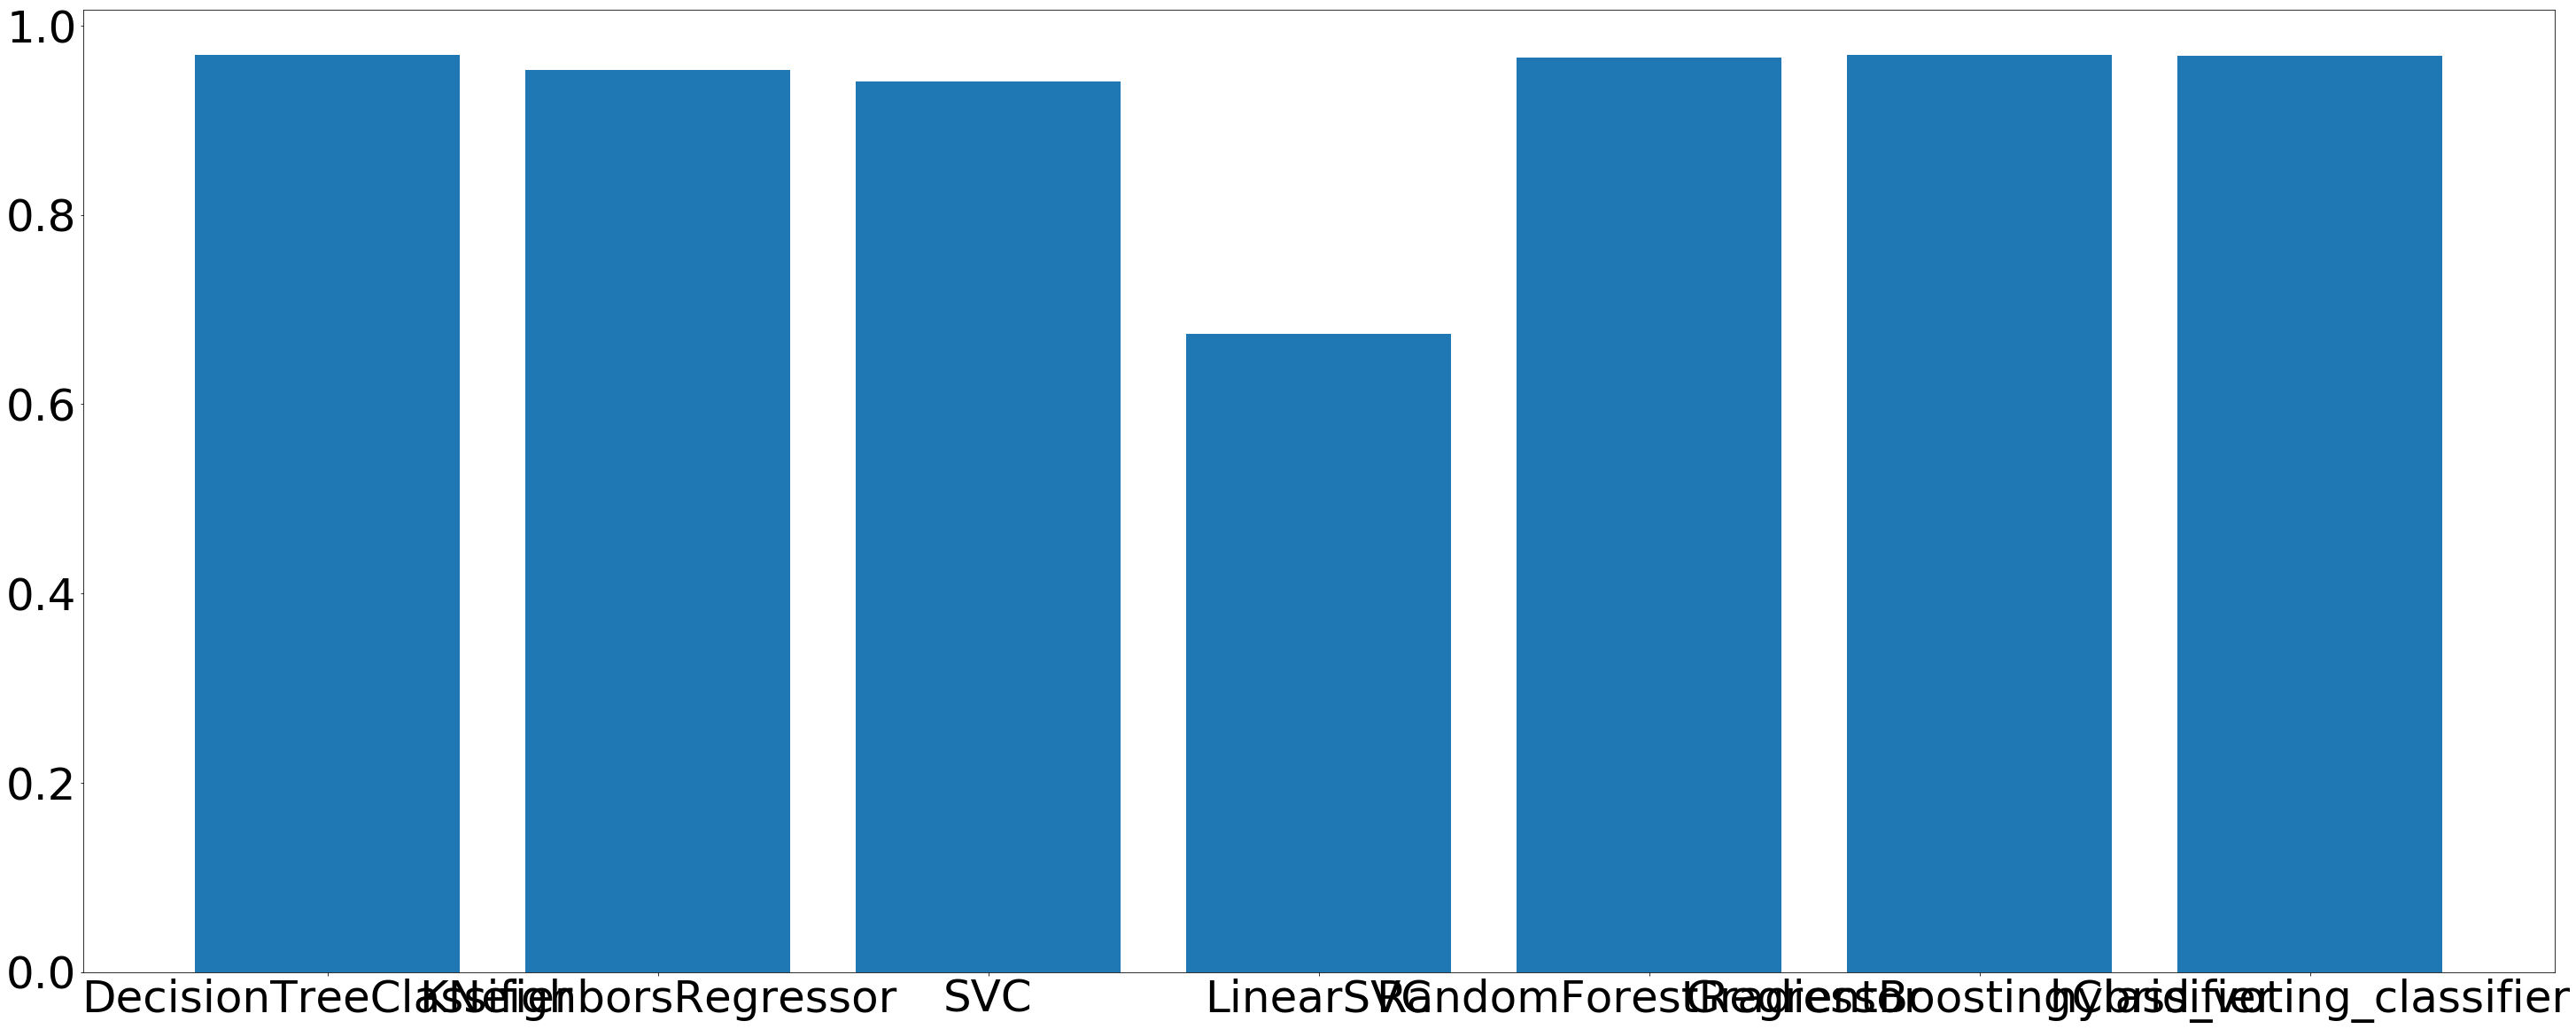

In [120]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 50
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

plt.bar(df1['Algorithm'],df1['Accuracy'])

## combined classifier shows the best accuracy without any overfitting problem